In [1]:
!pip install shap


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import shap
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_csv("C:/Users/nikhi/OneDrive/Desktop/PROJECT UI/credit_score.csv")
df.head()

CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0  C02COQEVYU   33269        0   532304            0.0000        16.0000   
1  C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2  C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3  C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4  C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0          1.2000           1889           945      0.5003  ...   
1          3.4615           5818           111      0.0191  ...   
2         24.7142           1157           860      0.7433  ...   
3          9.7499           6857          3686      0.5376  ...   
4          2.0465           1978           322      0.1628  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 0.0000              0.0625          High         1   
1                 0.7692              0.2222            No         1   
2                 1.4286              0.0578          High         1   
3                 1.2500              0.1282          High         1   
4                 0.1163              0.0568          High         1   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                0             0                    0               0   
1                0             0                    1               0   
2                0             0                    1               0   
3                0             0                    1               0   
4                1             1                    1               1   

   CREDIT_SCORE  DEFAULT  
0           444        1  
1           625        0  
2           469        1  
3           559        0  
4           473        0  

[5 rows x 87 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [ ]:
df.isnull().sum()

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64

In [ ]:
df.describe()

INCOME       SAVINGS          DEBT  R_SAVINGS_INCOME  \
count    1000.000000  1.000000e+03  1.000000e+03       1000.000000   
mean   121610.019000  4.131896e+05  7.907180e+05          4.063477   
std    113716.699591  4.429160e+05  9.817904e+05          3.968097   
min         0.000000  0.000000e+00  0.000000e+00          0.000000   
25%     30450.250000  5.971975e+04  5.396675e+04          1.000000   
50%     85090.000000  2.738505e+05  3.950955e+05          2.545450   
75%    181217.500000  6.222600e+05  1.193230e+06          6.307100   
max    662094.000000  2.911863e+06  5.968620e+06         16.111200   

       R_DEBT_INCOME  R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  \
count    1000.000000     1000.000000    1000.000000   1000.000000   
mean        6.068449        5.867252    6822.401000   3466.320000   
std         5.847878       16.788356    7486.225932   5118.942977   
min         0.000000        0.000000       0.000000      0.000000   
25%         1.454500        0.206200    1084.500000    319.500000   
50%         4.911550        2.000000    4494.000000   1304.000000   
75%         8.587475        4.509600   10148.500000   4555.500000   
max        37.000600      292.842100   43255.000000  39918.000000   

        R_CLOTHING  R_CLOTHING_INCOME  ...  R_EXPENDITURE_INCOME  \
count  1000.000000        1000.000000  ...           1000.000000   
mean      0.454848           0.055557  ...              0.943607   
std       0.236036           0.037568  ...              0.168989   
min       0.000000           0.003400  ...              0.666700   
25%       0.263950           0.029700  ...              0.833300   
50%       0.468850           0.046800  ...              0.909100   
75%       0.626300           0.069400  ...              1.000000   
max       1.058300           0.251700  ...              2.000200   

       R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT     CAT_DEBT  \
count            1000.000000         1000.000000  1000.000000   
mean                0.913340            0.605276     0.944000   
std                 1.625278            1.299382     0.230037   
min                 0.000000            0.000000     0.000000   
25%                 0.158700            0.100000     1.000000   
50%                 0.327950            0.178600     1.000000   
75%                 0.833300            0.588200     1.000000   
max                10.009900           10.005300     1.000000   

       CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
count      1000.000000   1000.000000          1000.000000      1000.00000   
mean          0.236000      0.173000             0.993000         0.15000   
std           0.424835      0.378437             0.083414         0.35725   
min           0.000000      0.000000             0.000000         0.00000   
25%           0.000000      0.000000             1.000000         0.00000   
50%           0.000000      0.000000             1.000000         0.00000   
75%           0.000000      0.000000             1.000000         0.00000   
max           1.000000      1.000000             1.000000         1.00000   

       CREDIT_SCORE      DEFAULT  
count   1000.000000  1000.000000  
mean     586.712000     0.284000  
std       63.413882     0.451162  
min      300.000000     0.000000  
25%      554.750000     0.000000  
50%      596.000000     0.000000  
75%      630.000000     1.000000  
max      800.000000     1.000000  

[8 rows x 85 columns]

<ipython-input-7-d1027d8f63ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEFAULT', data=df, palette='coolwarm')


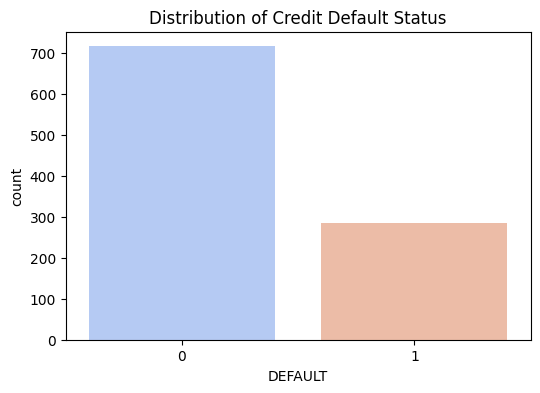

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='DEFAULT', data=df, palette='coolwarm')
plt.title("Distribution of Credit Default Status")
plt.show()

<ipython-input-8-2f6d8750fe21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


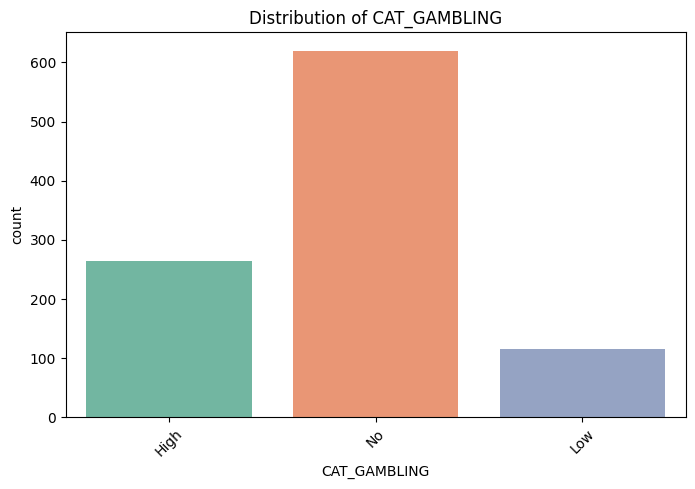

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Skip the first categorical column
for col in categorical_cols[1:]:  # Starts from the second column
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

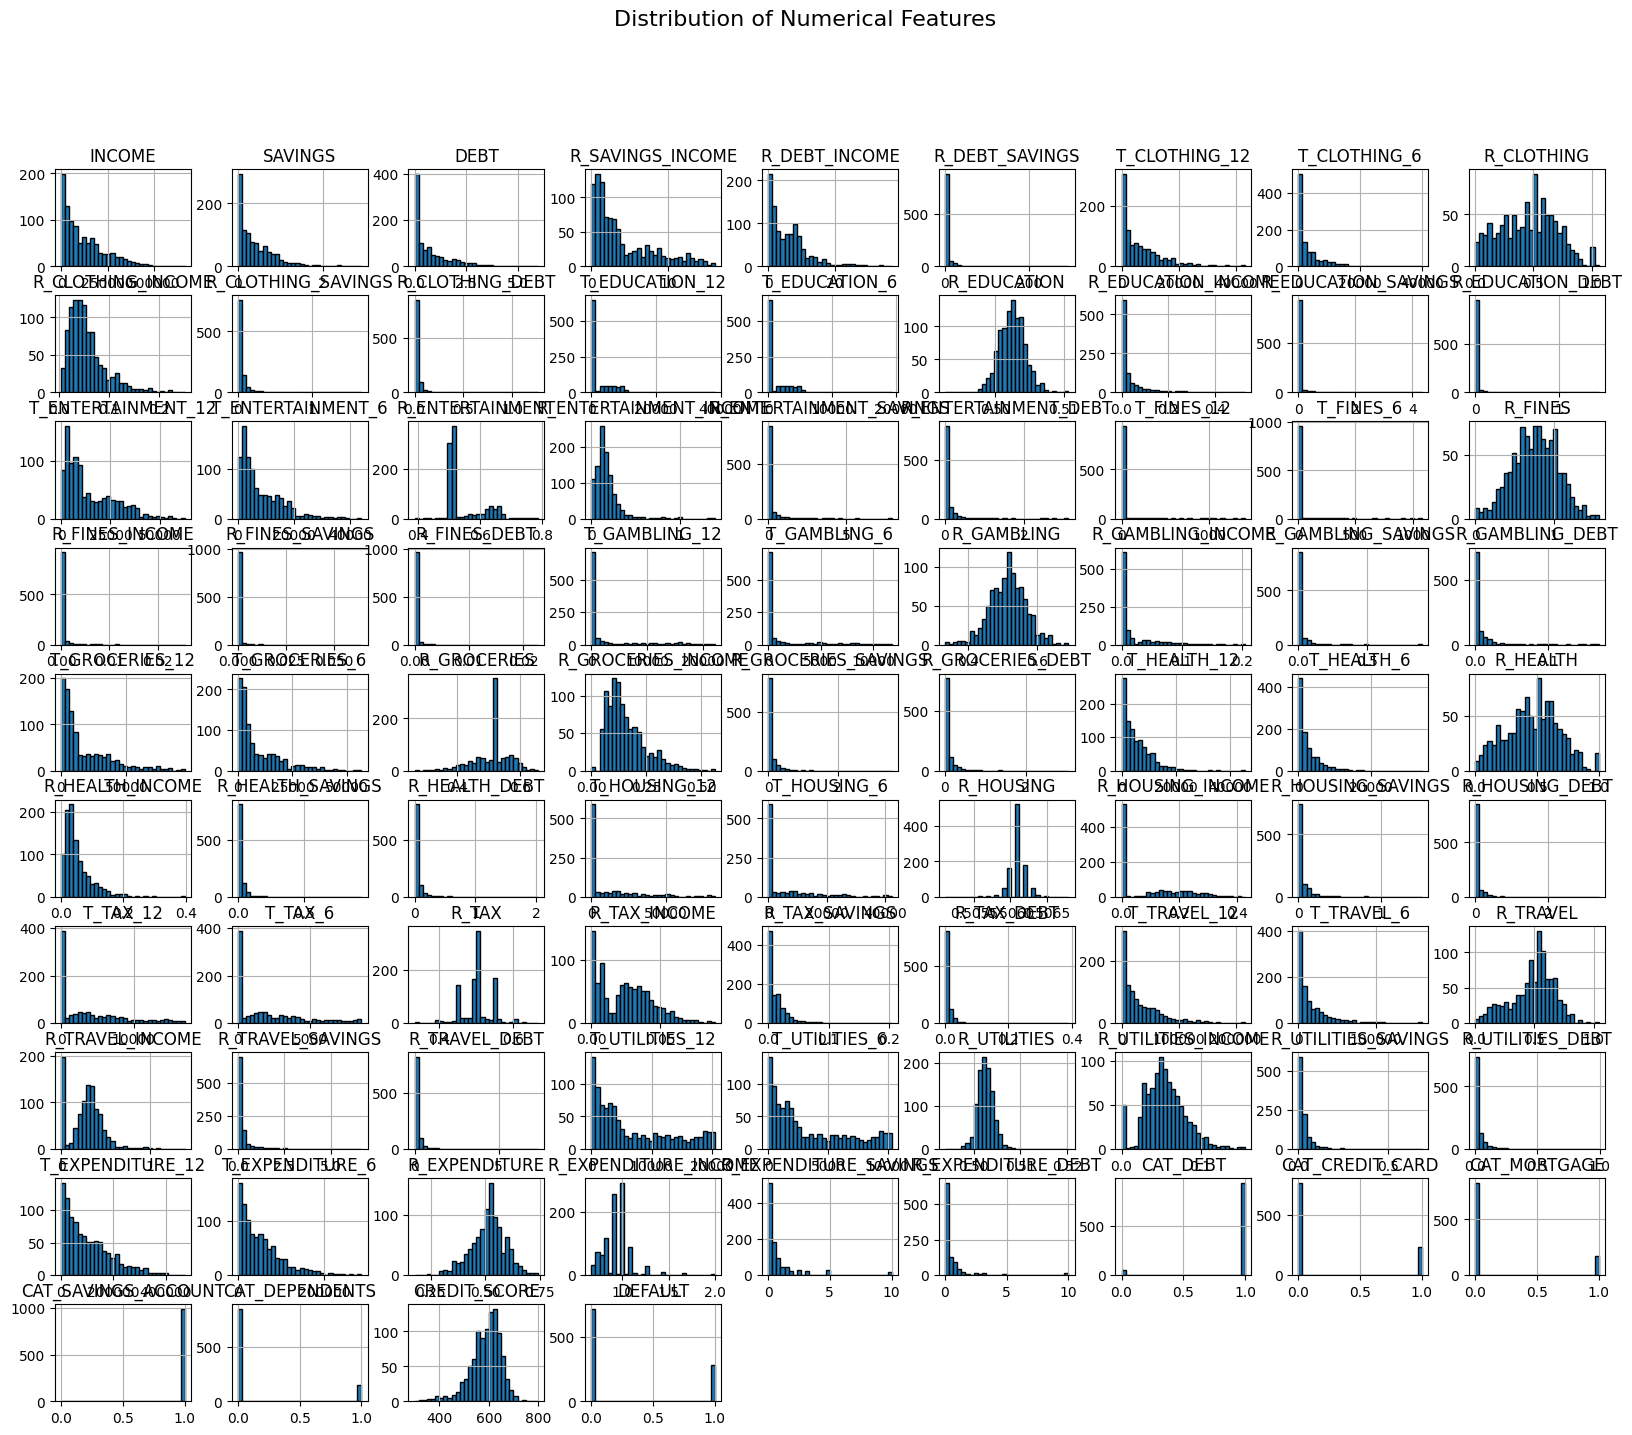

In [ ]:
# Distribution of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(20, 16), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

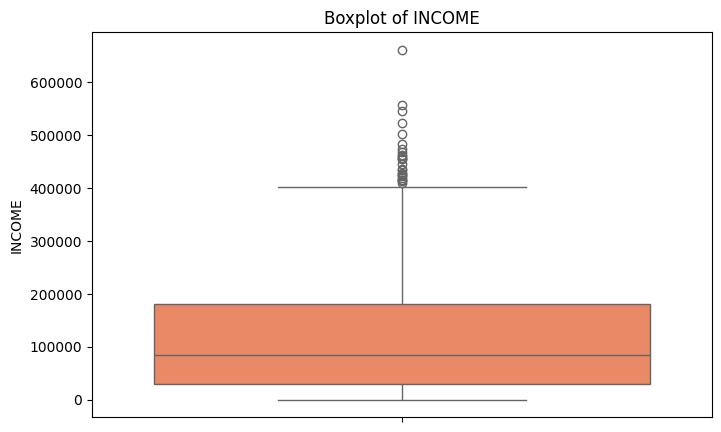

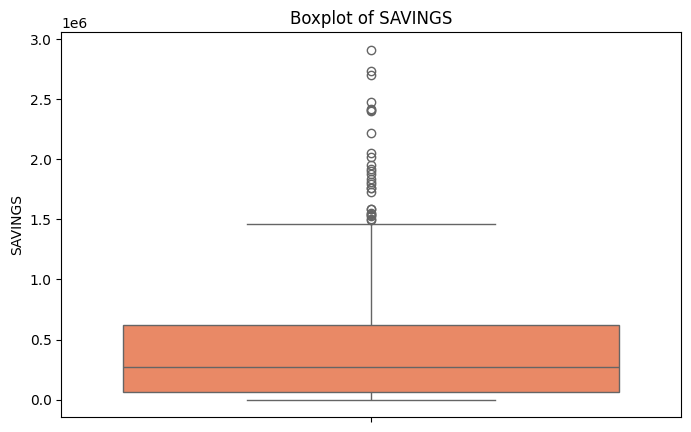

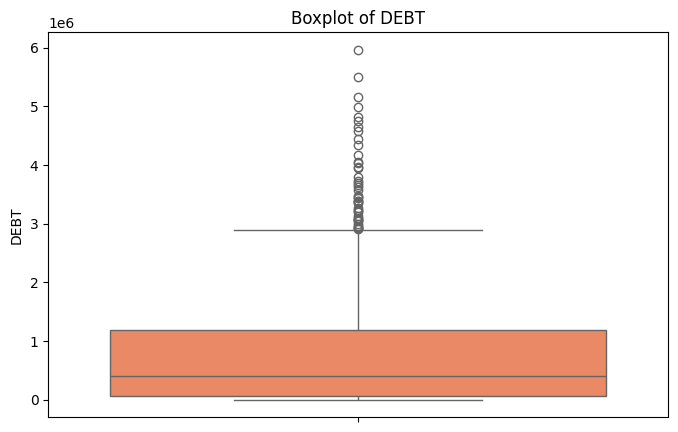

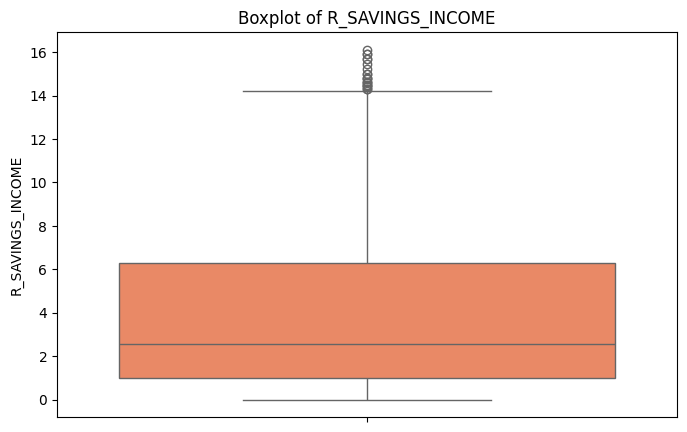

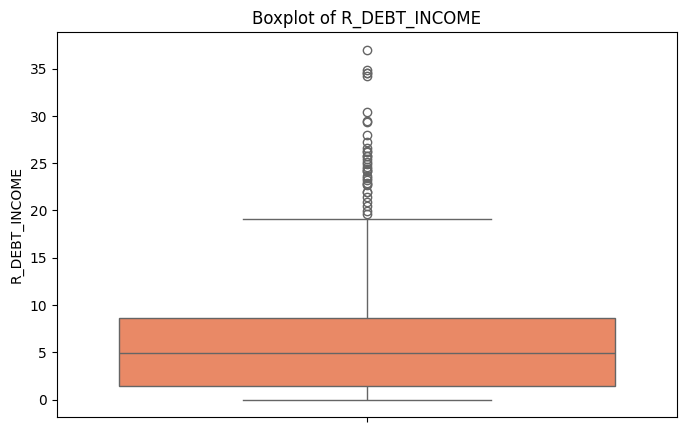

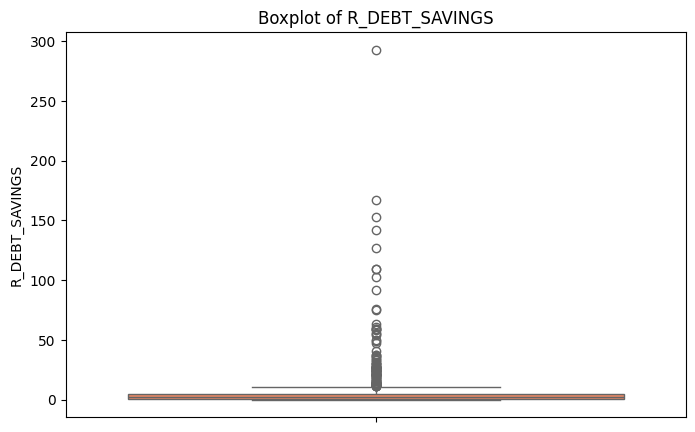

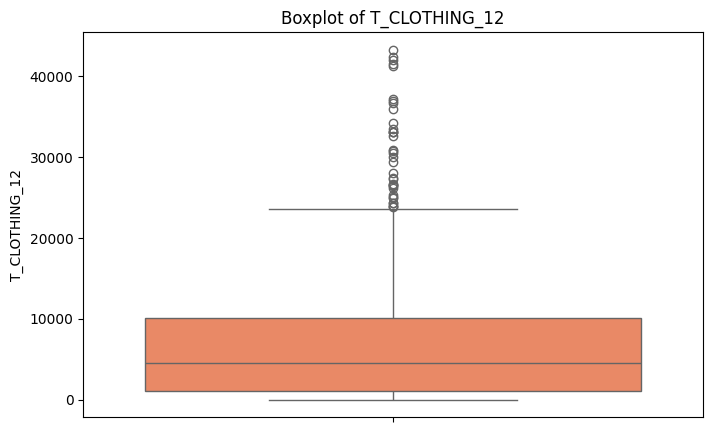

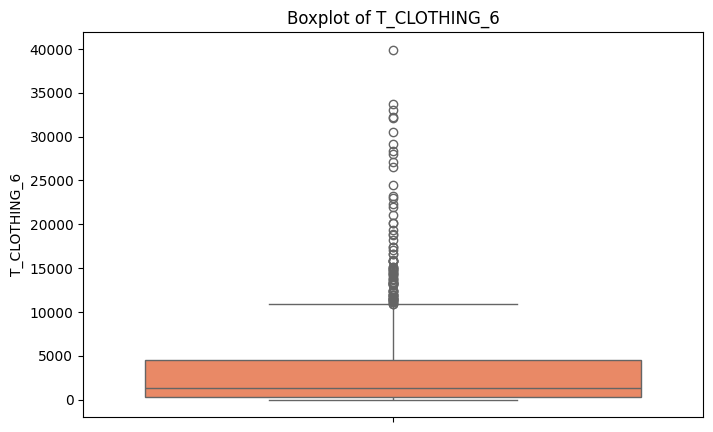

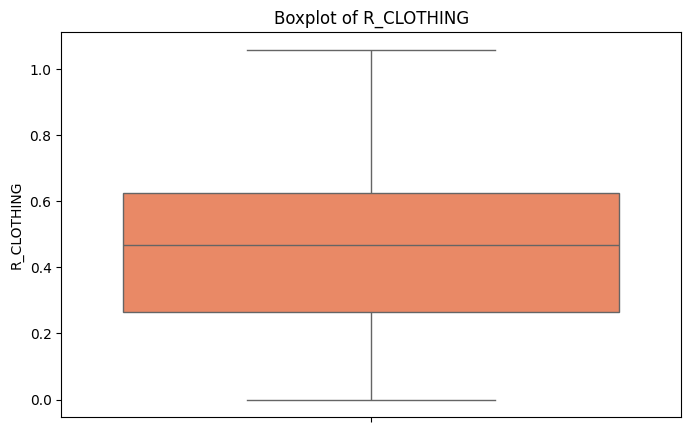

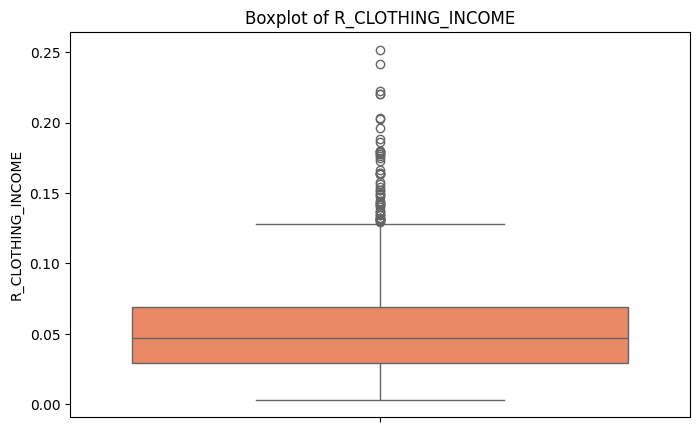

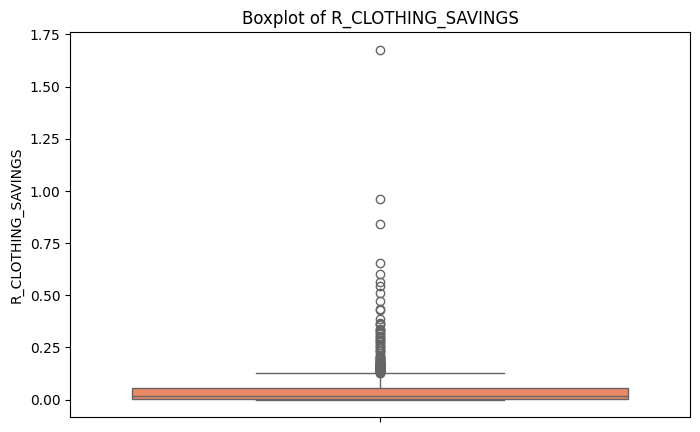

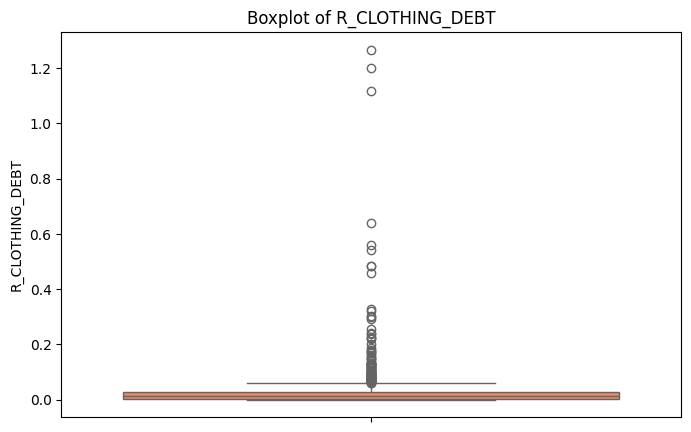

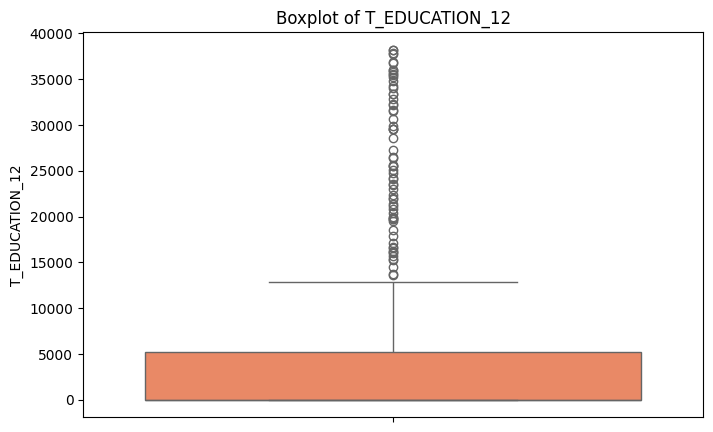

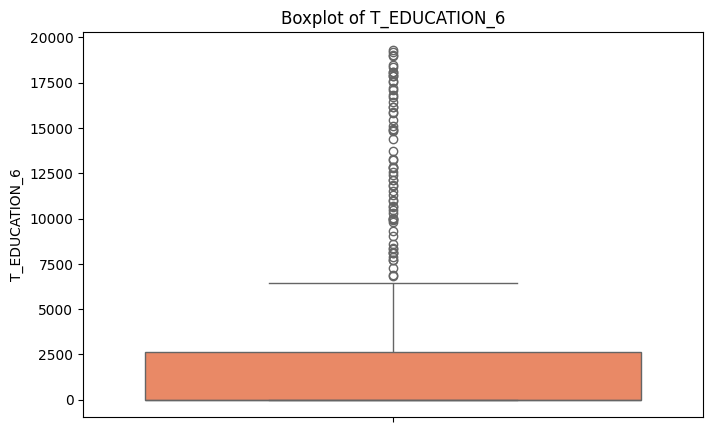

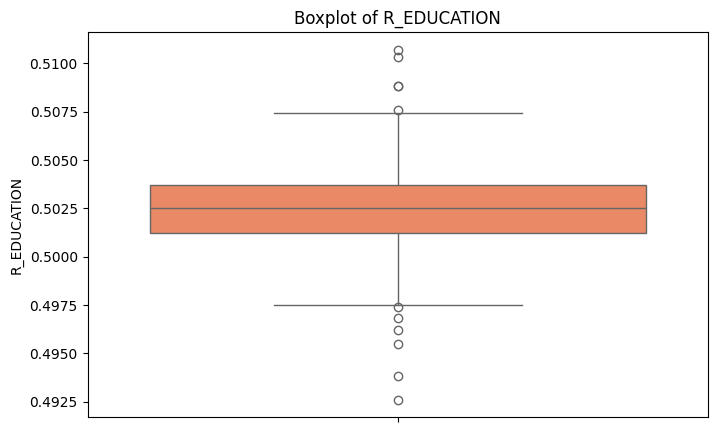

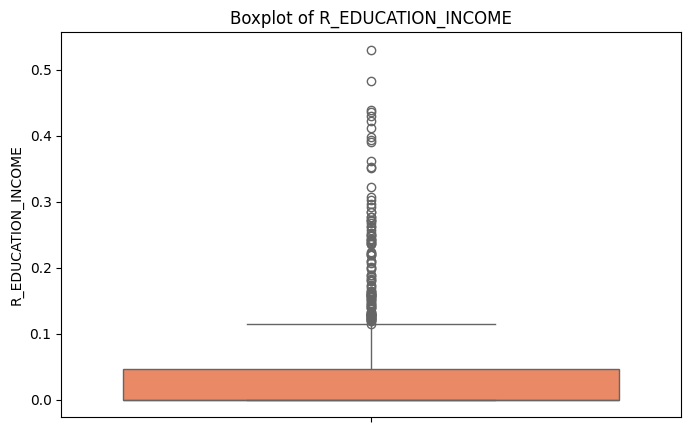

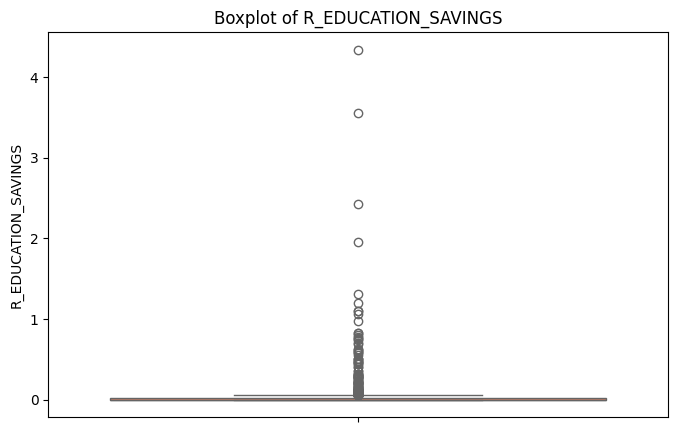

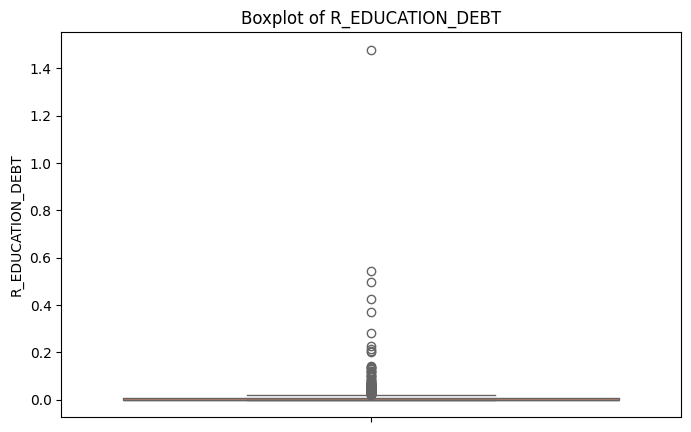

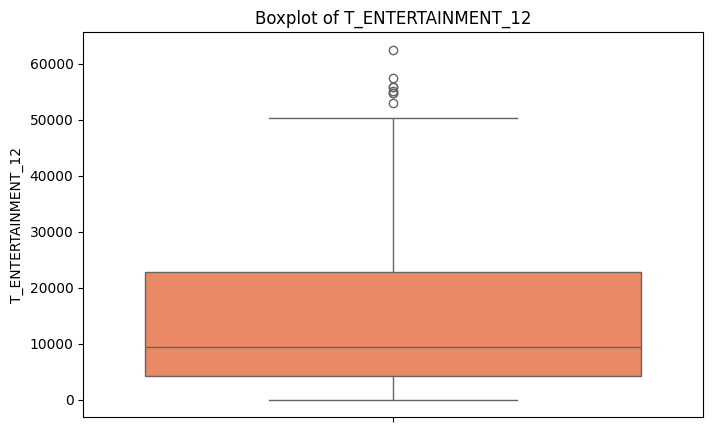

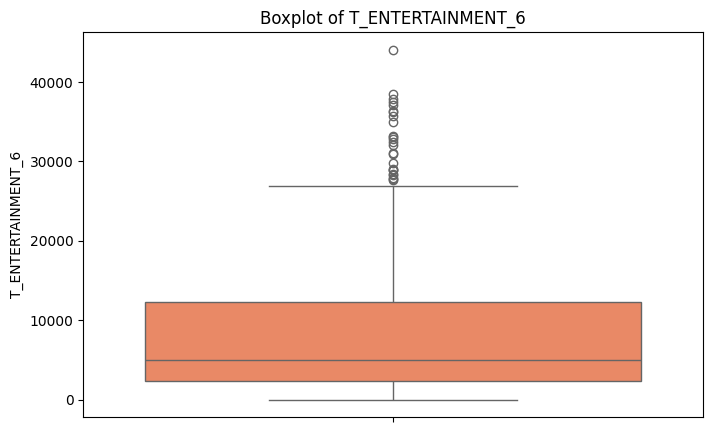

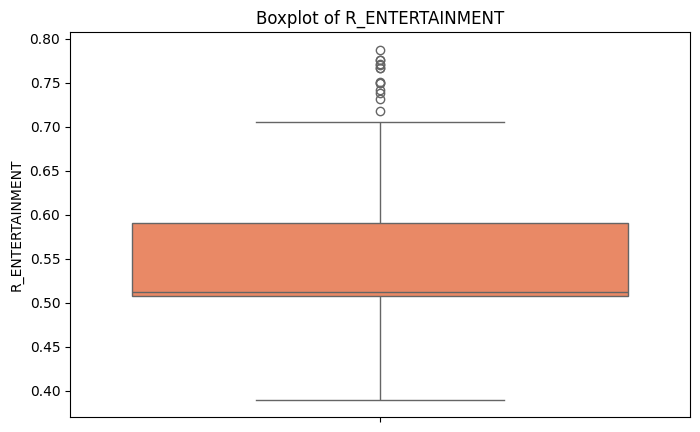

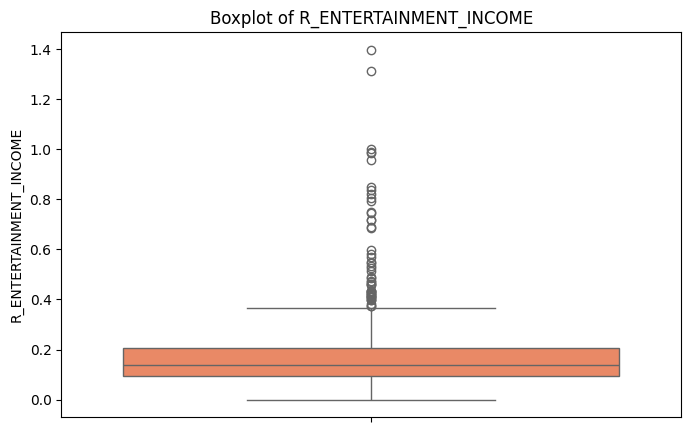

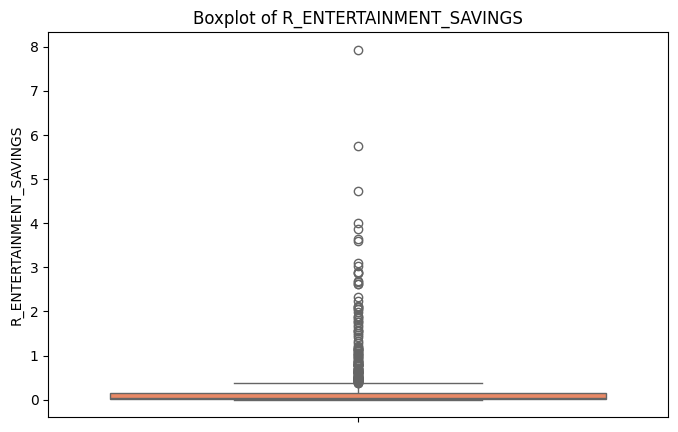

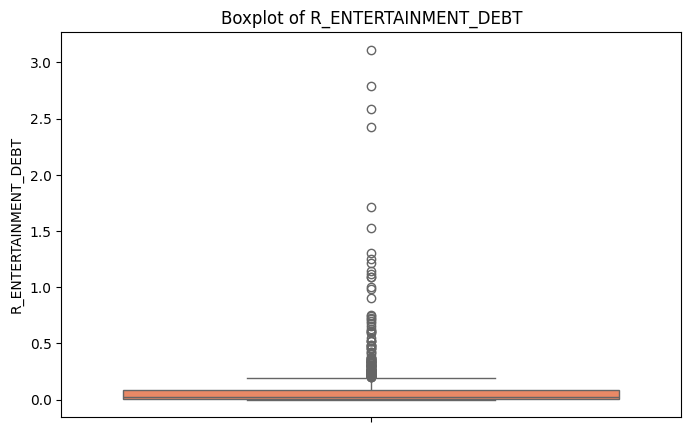

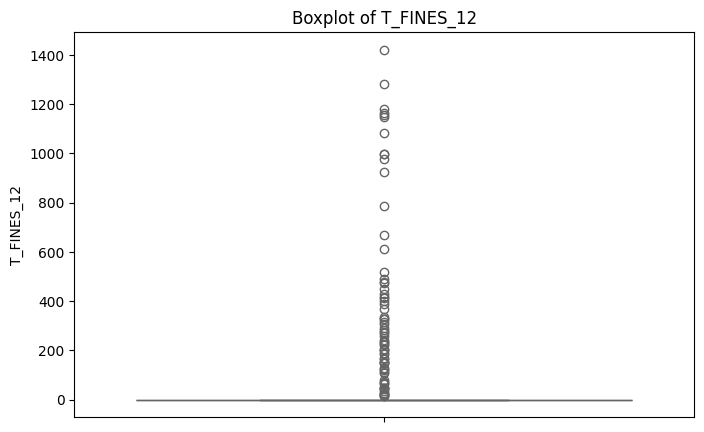

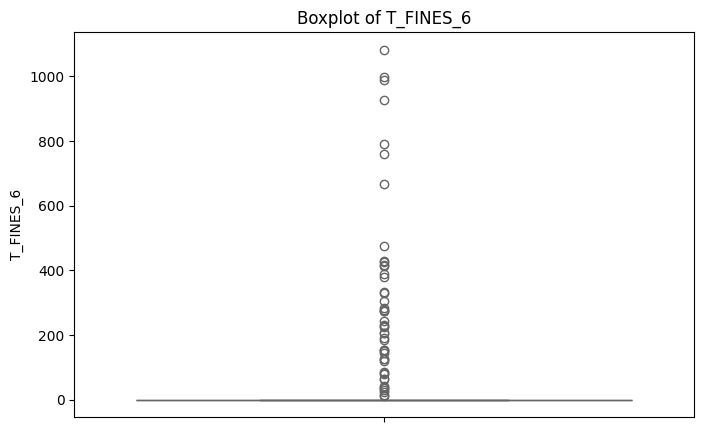

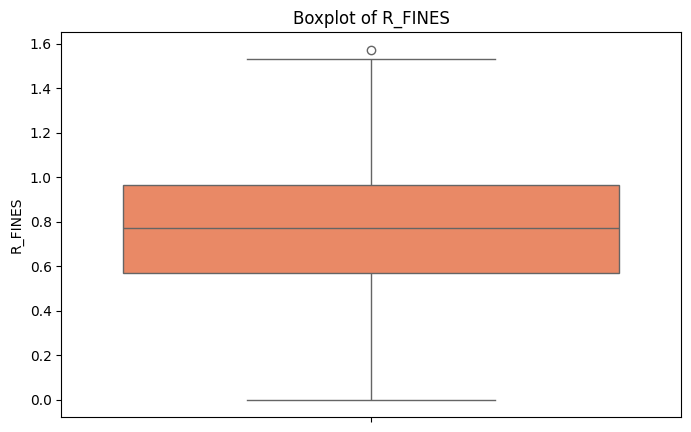

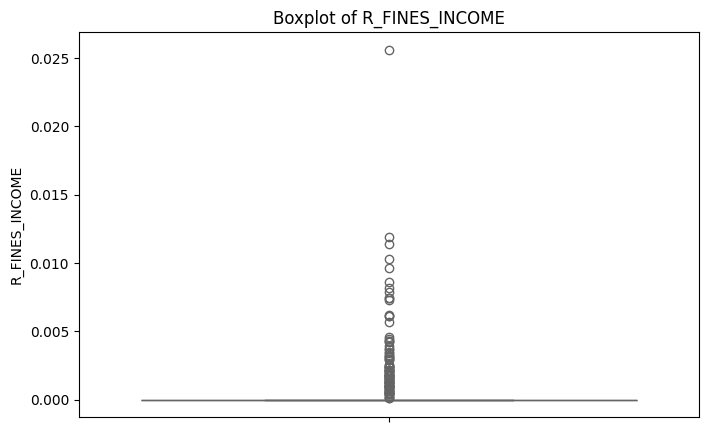

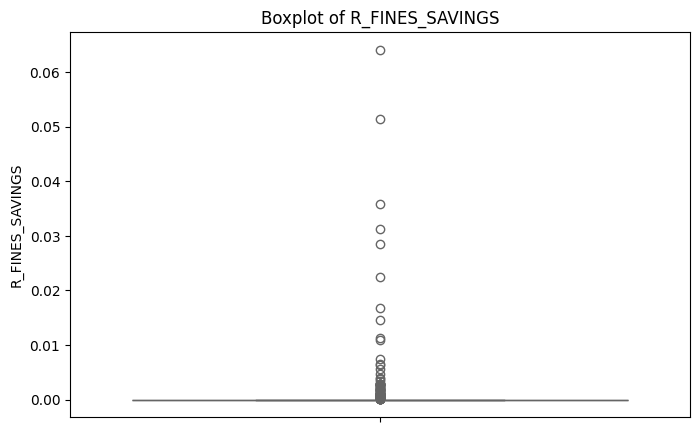

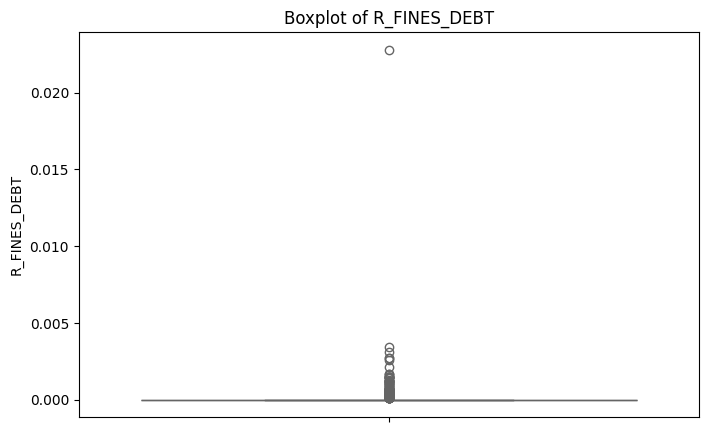

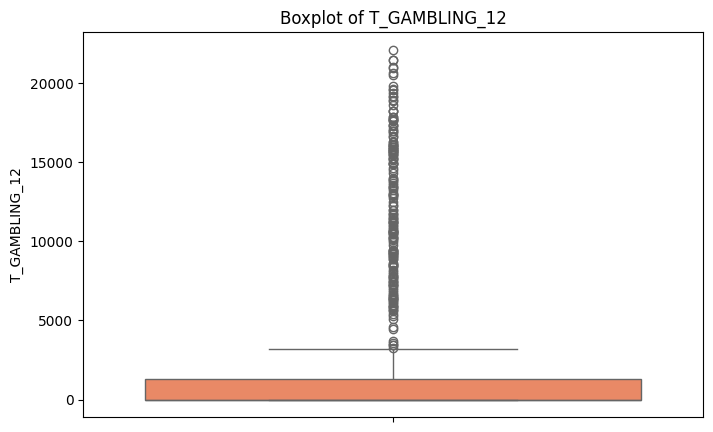

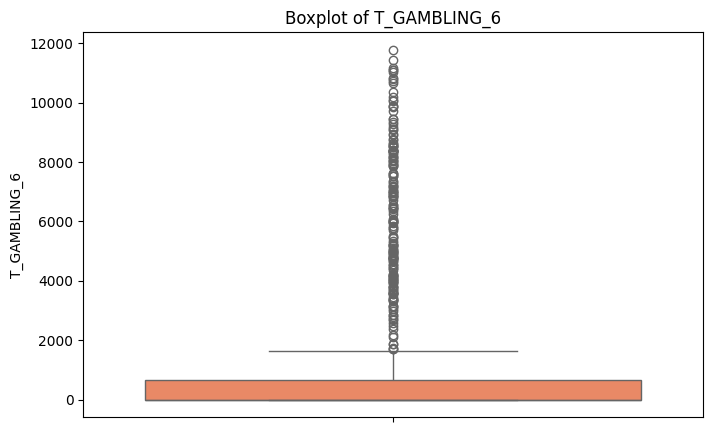

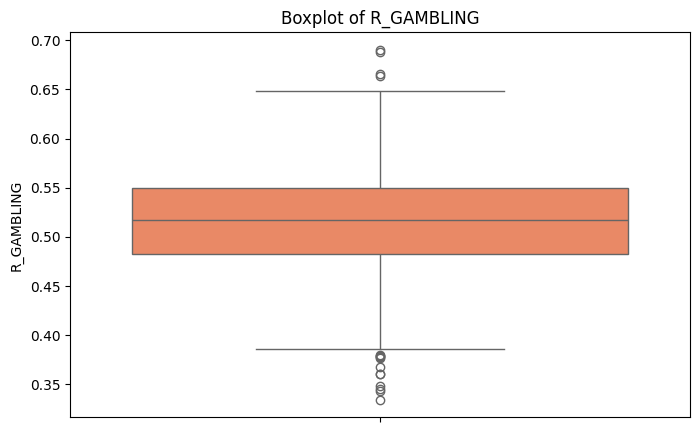

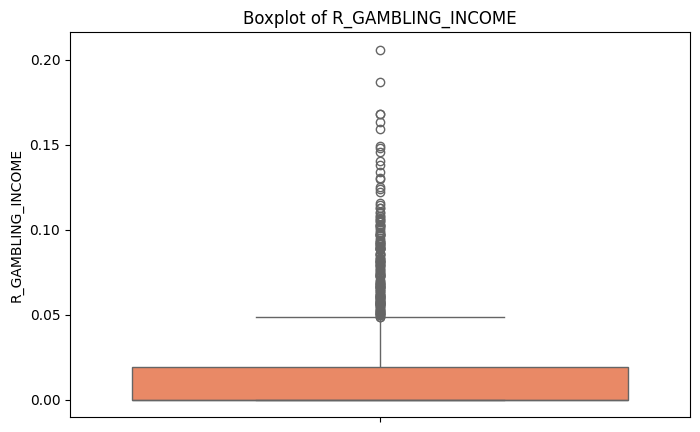

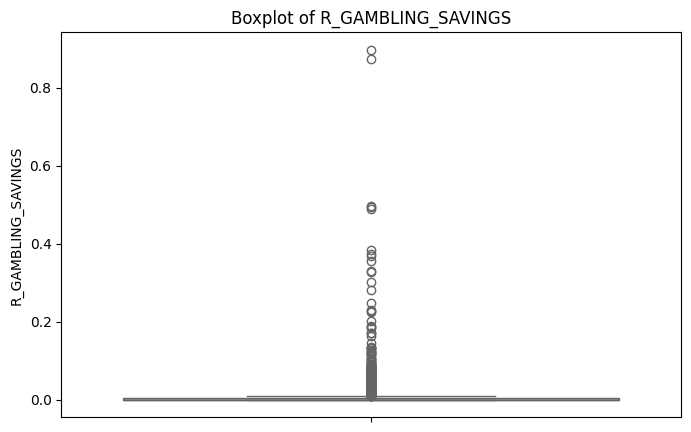

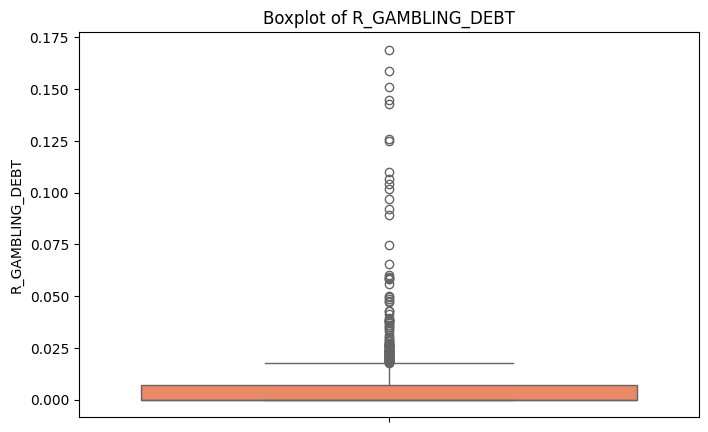

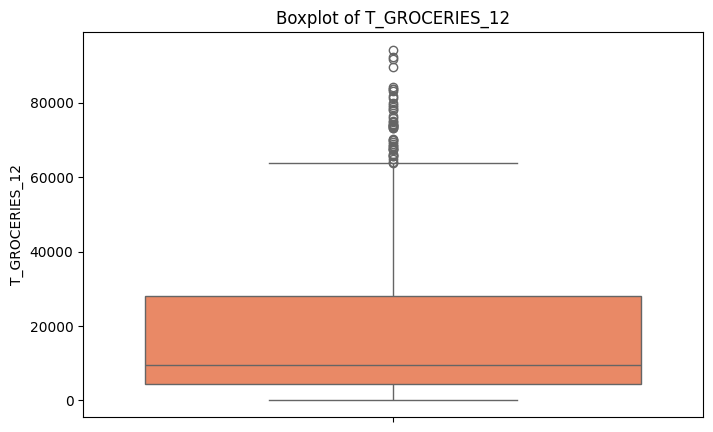

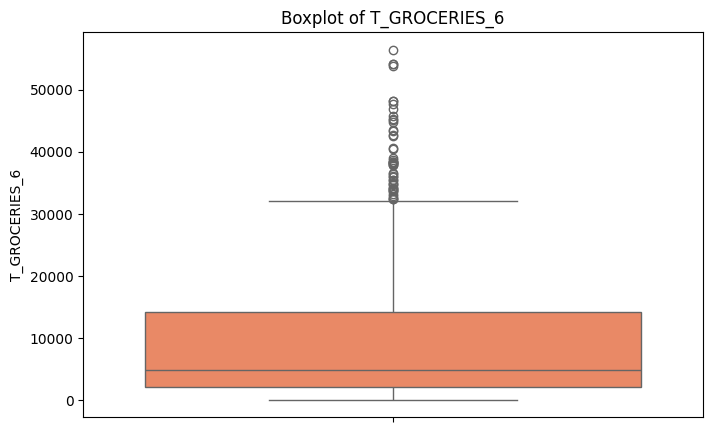

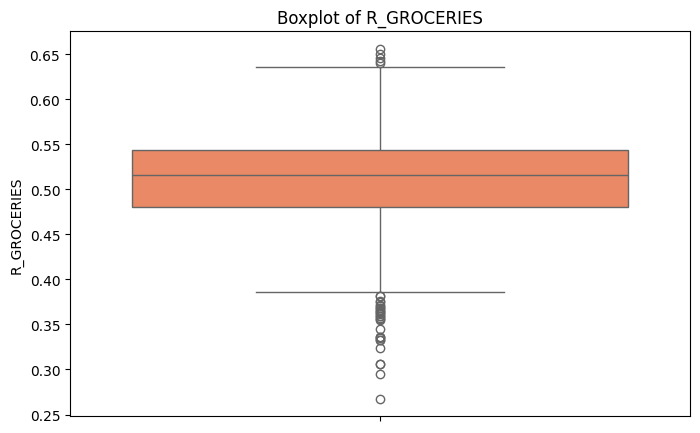

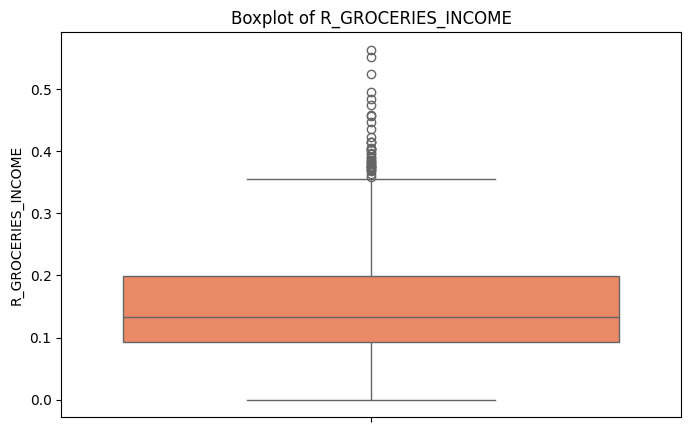

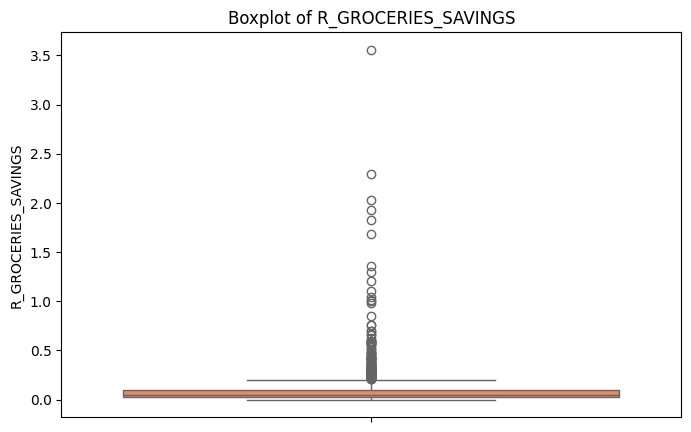

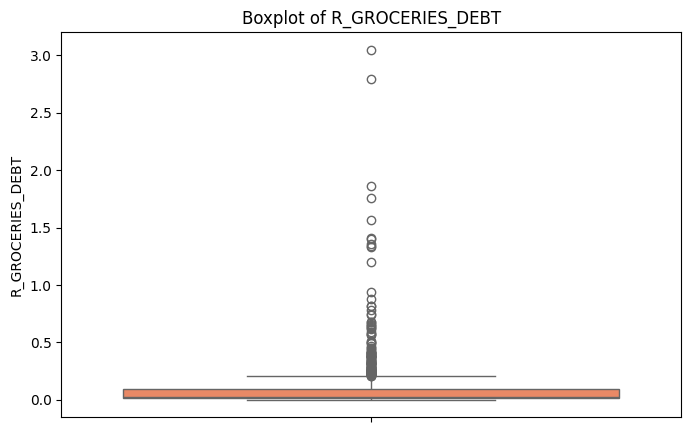

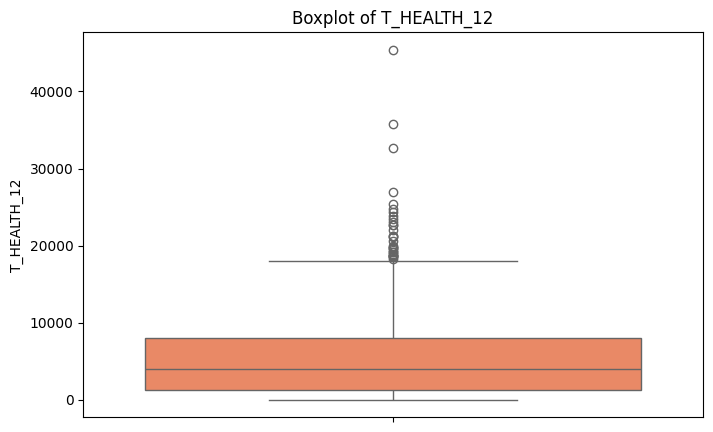

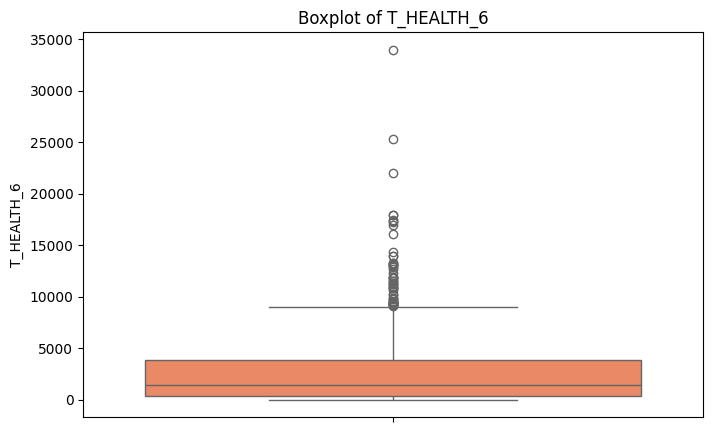

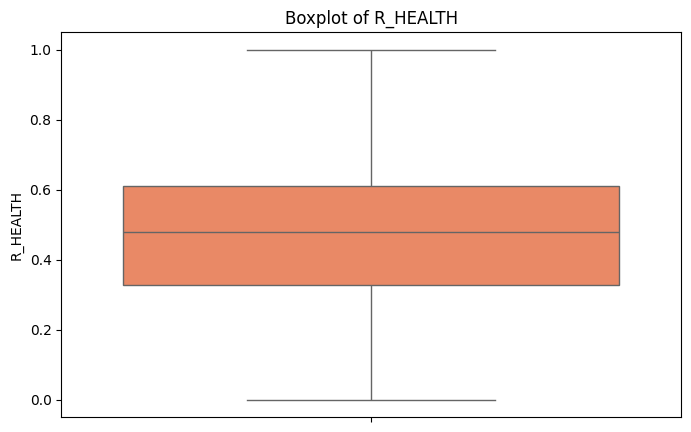

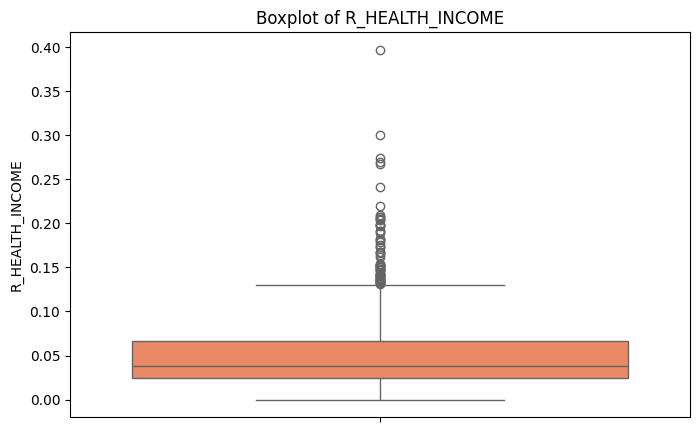

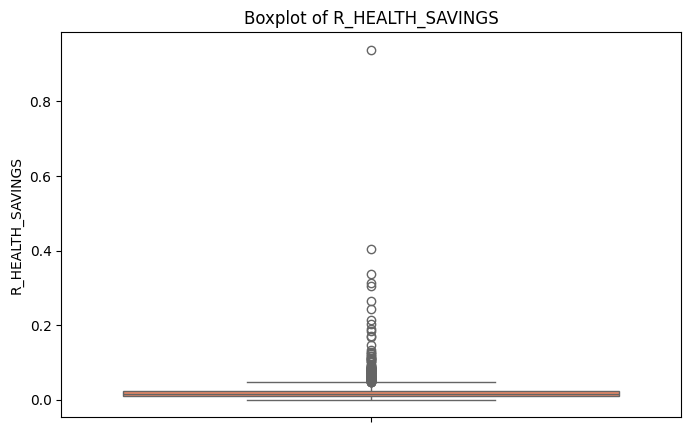

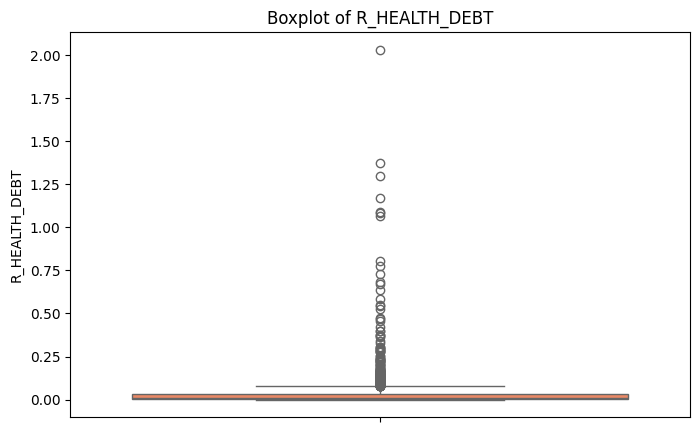

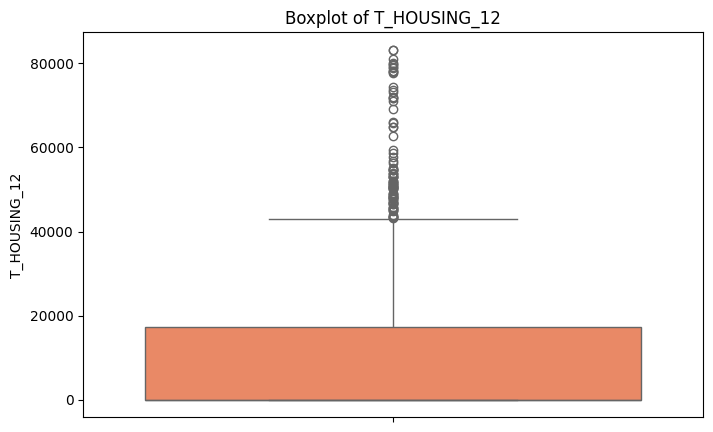

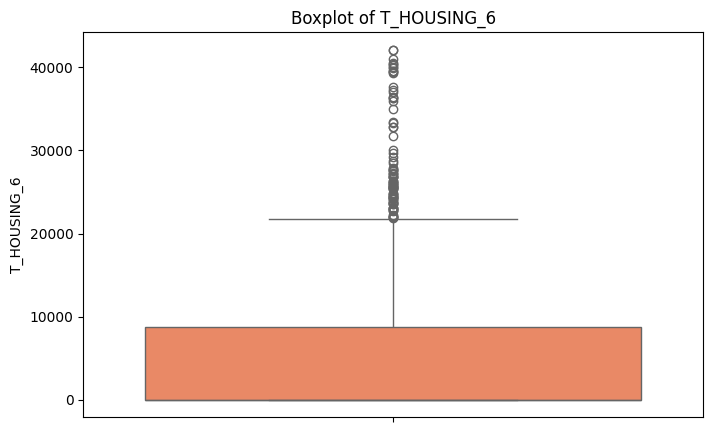

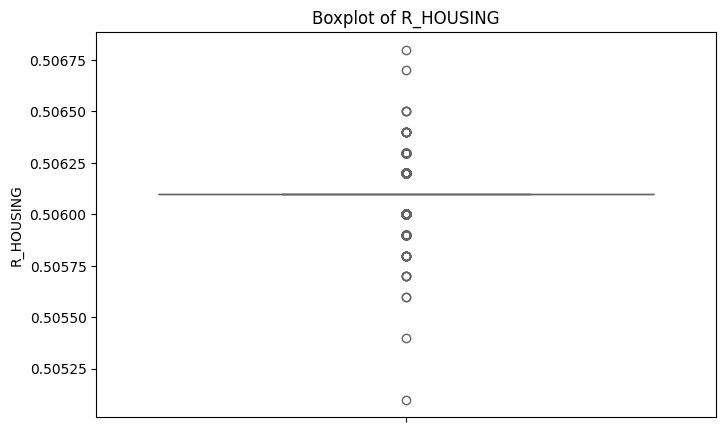

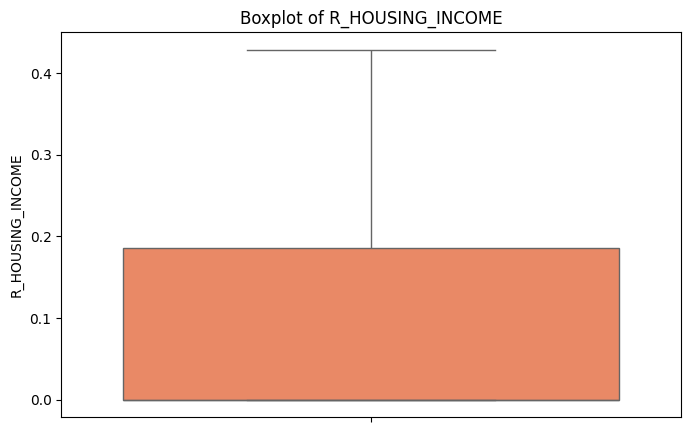

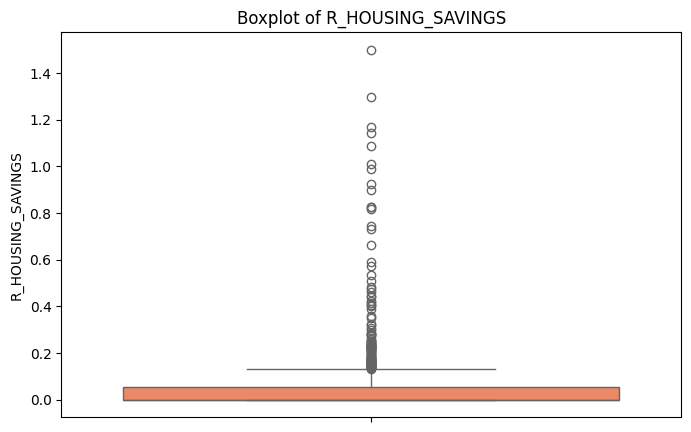

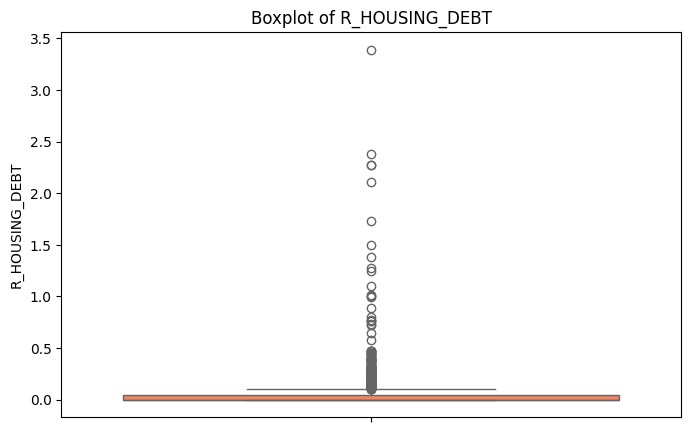

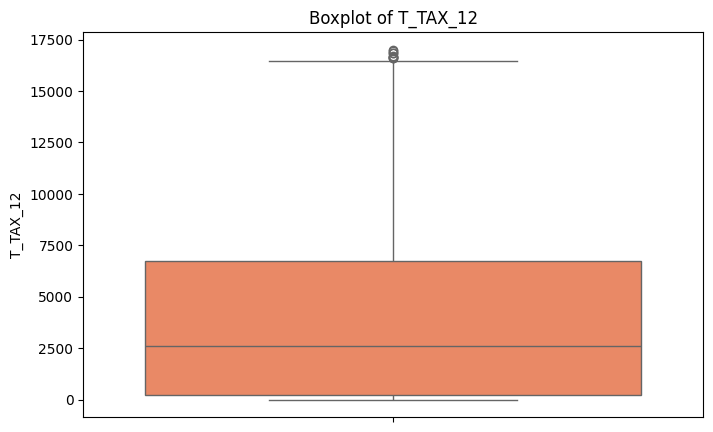

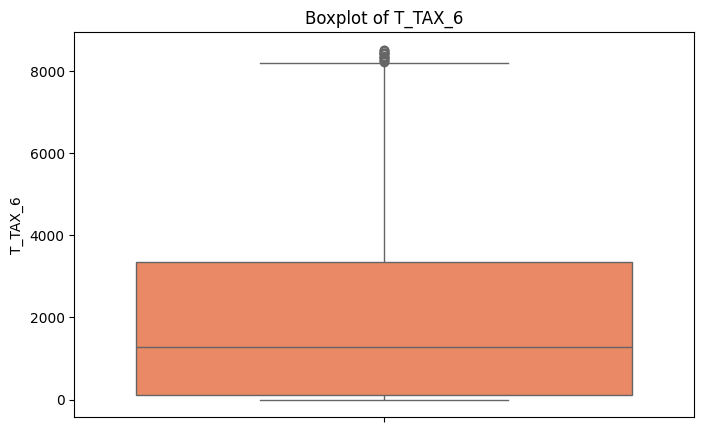

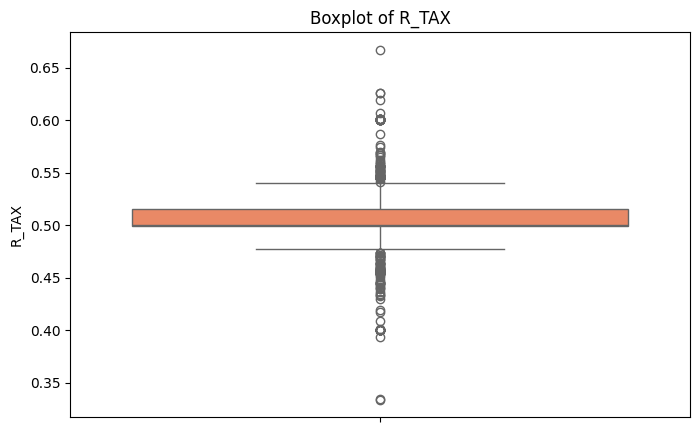

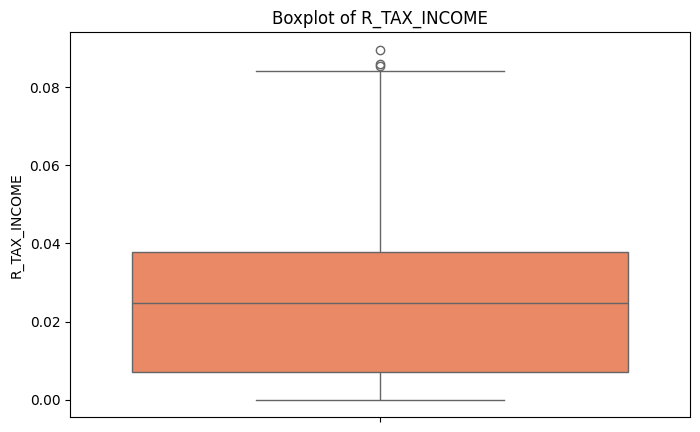

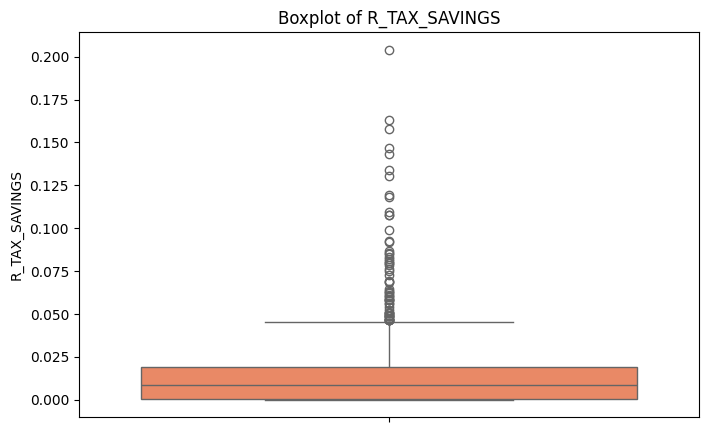

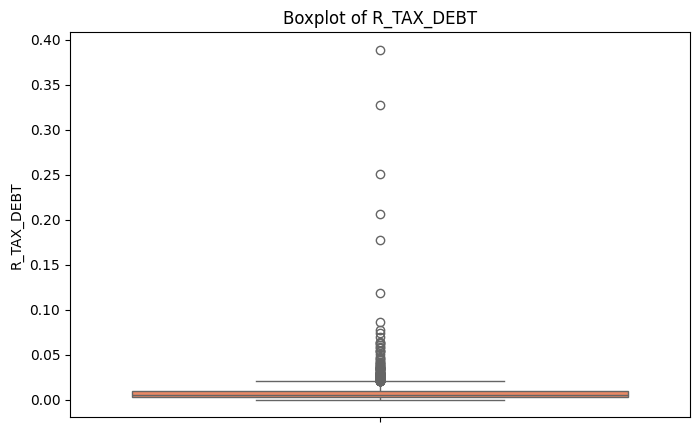

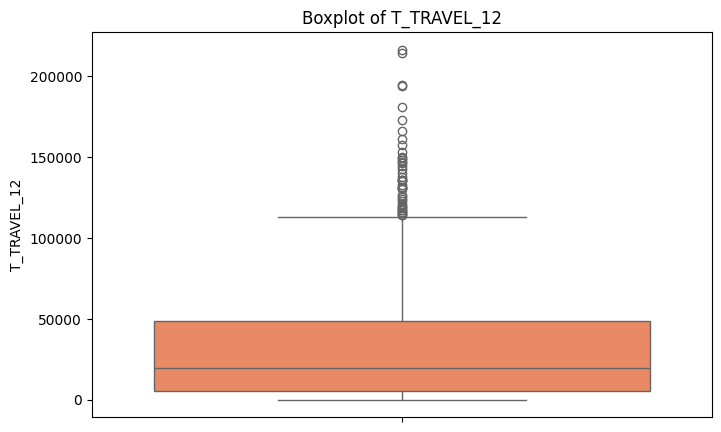

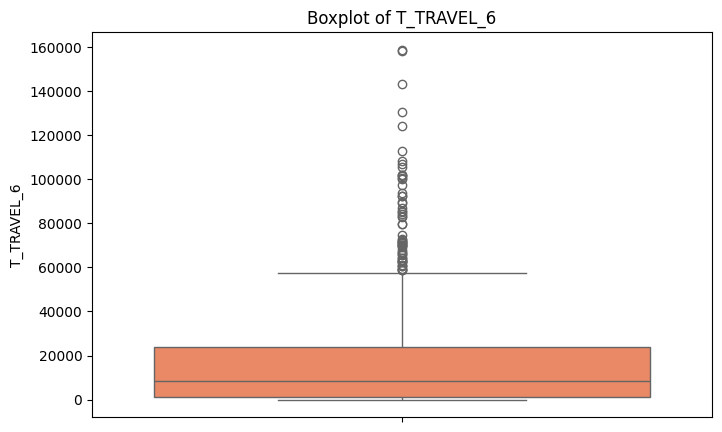

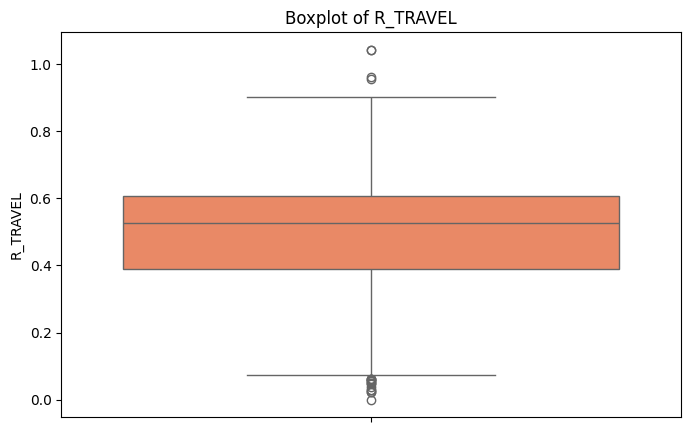

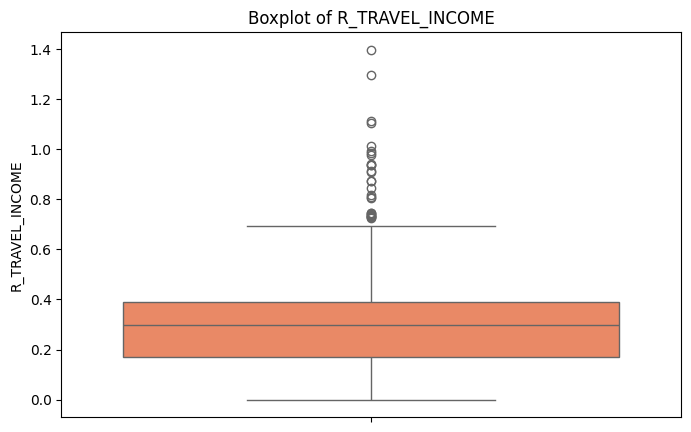

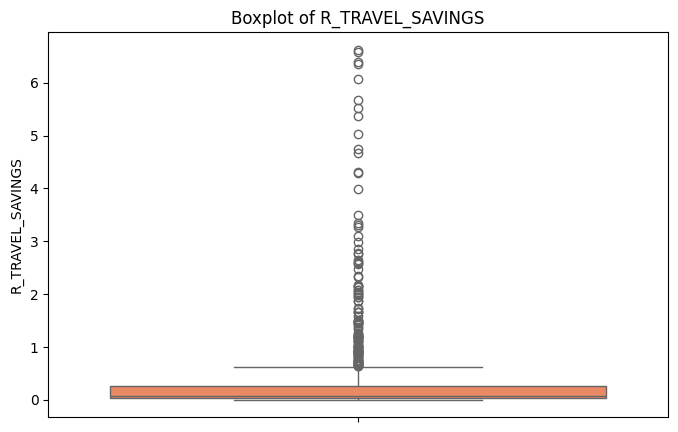

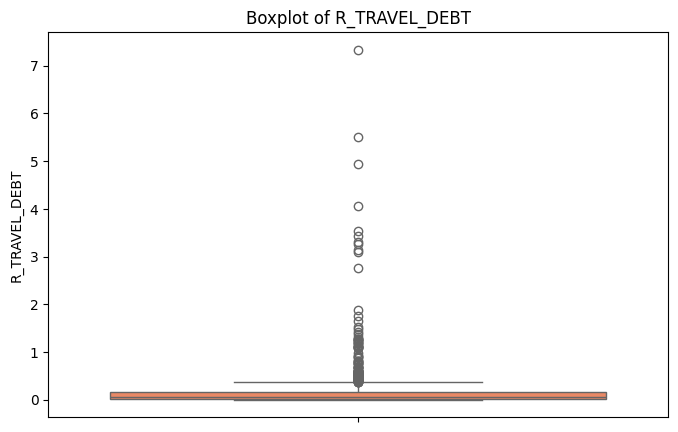

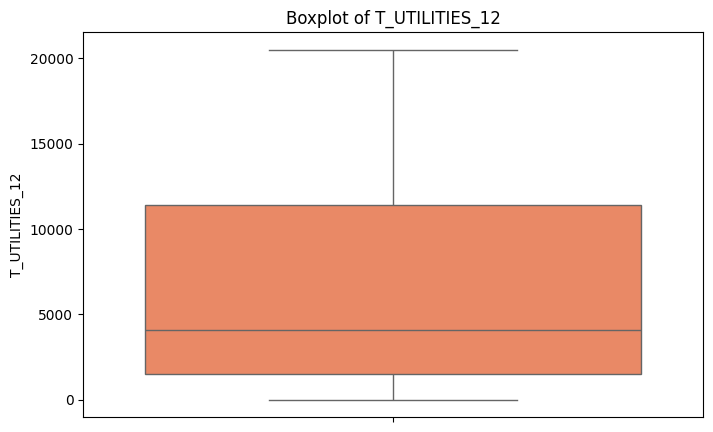

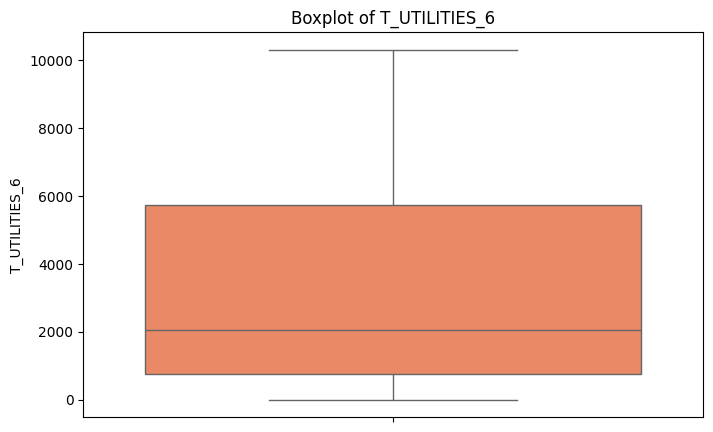

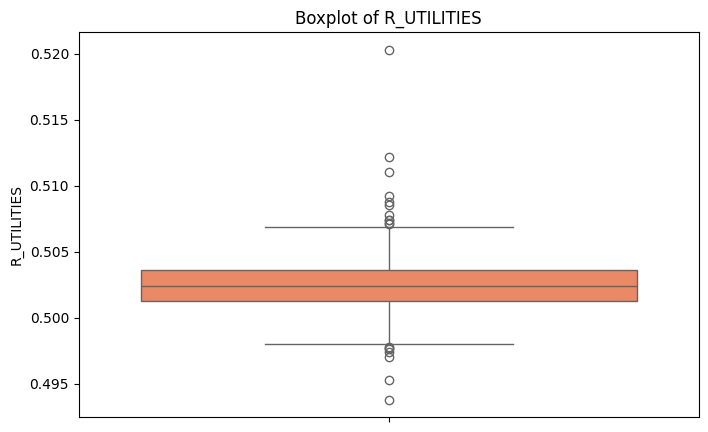

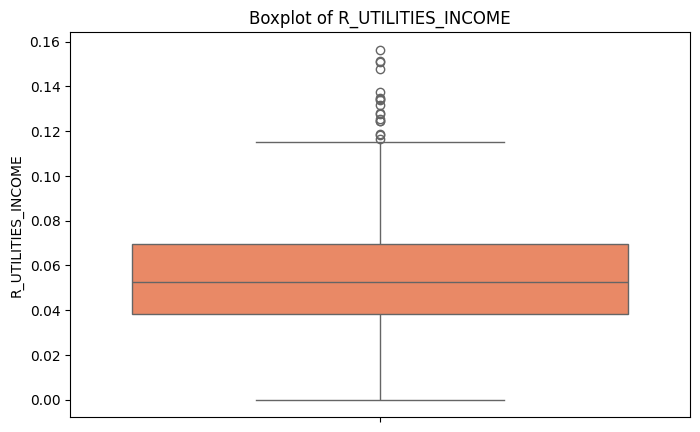

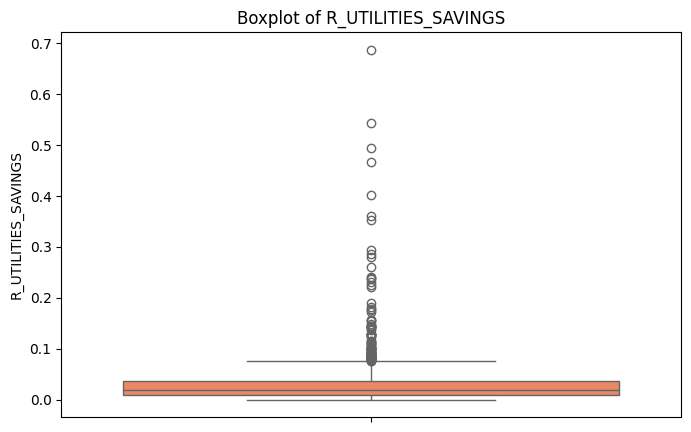

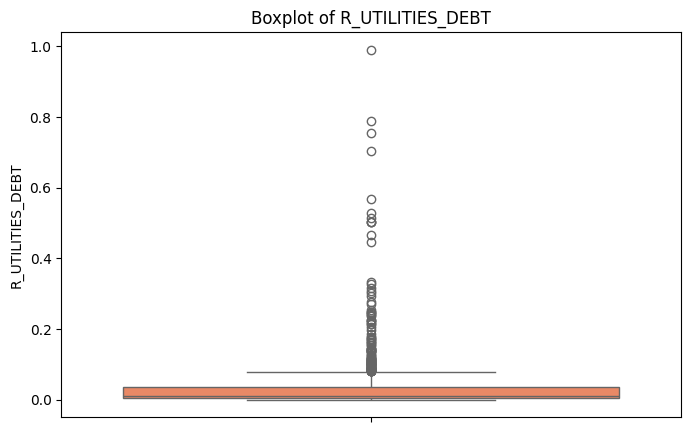

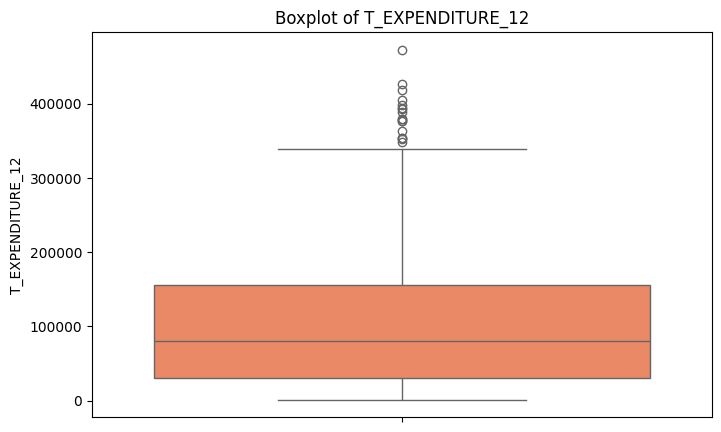

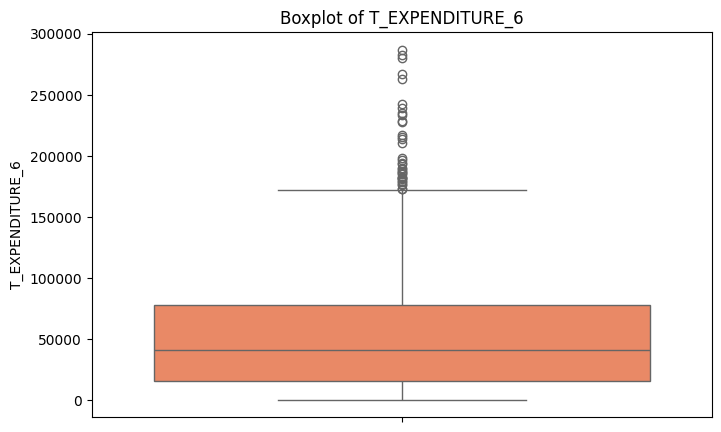

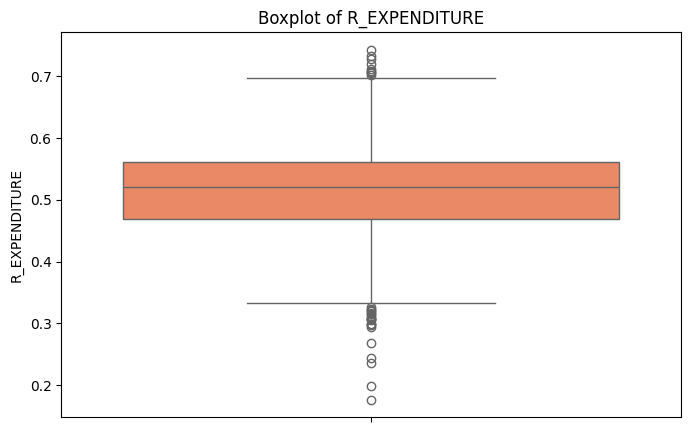

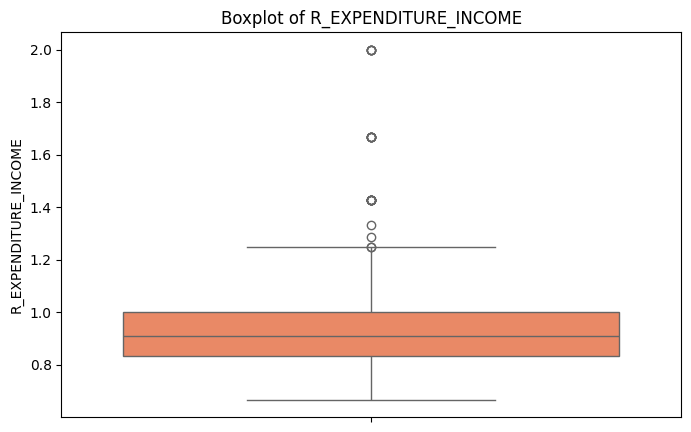

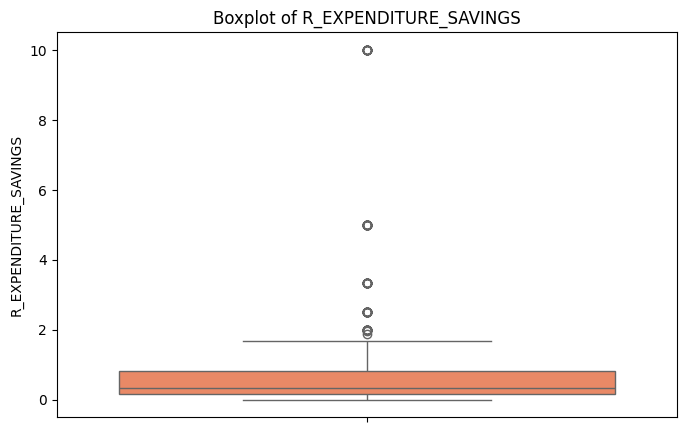

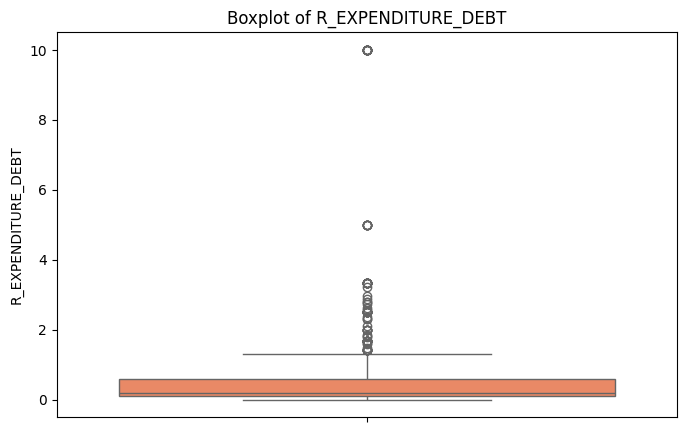

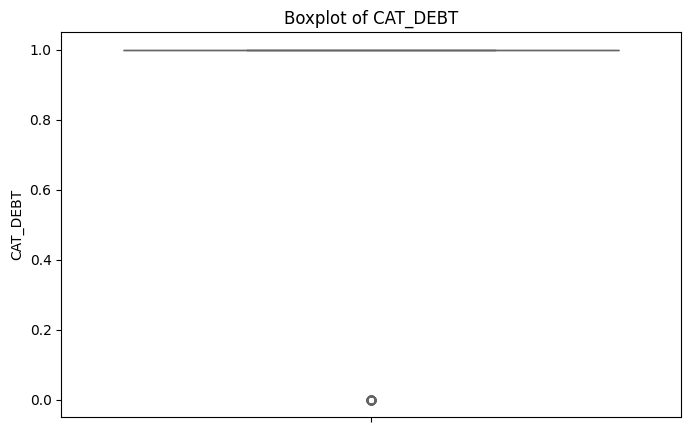

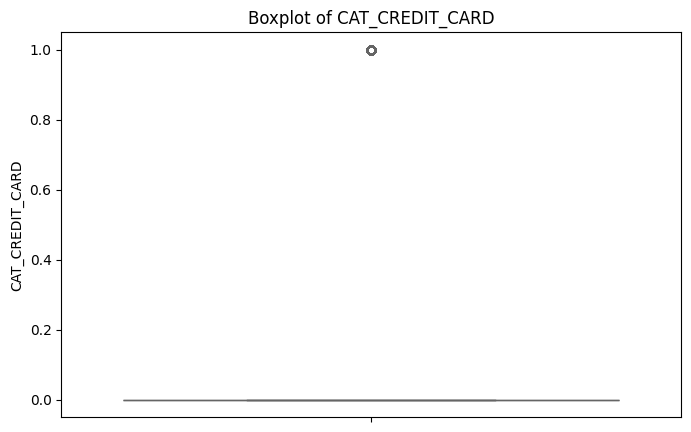

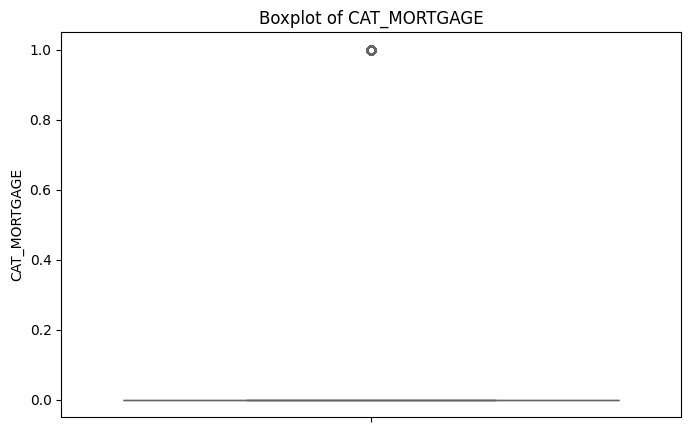

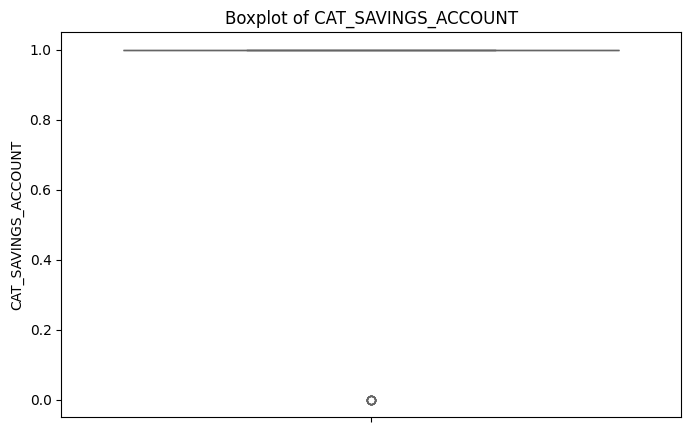

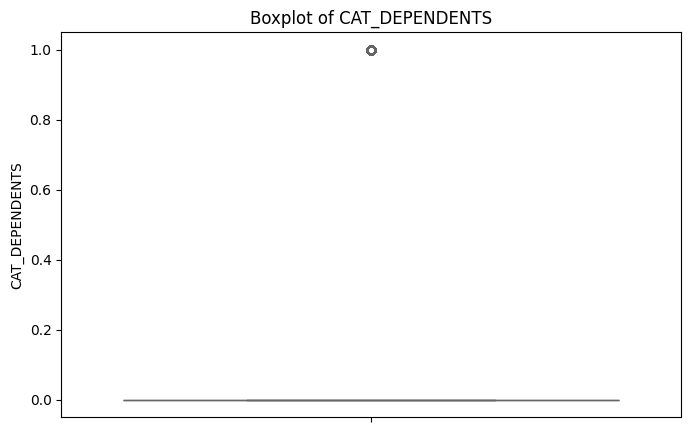

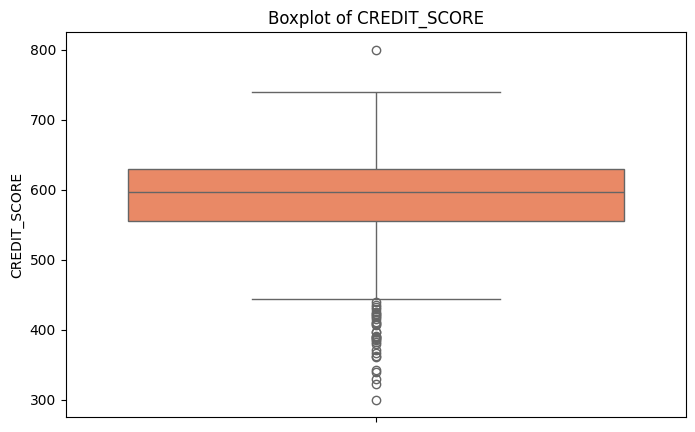

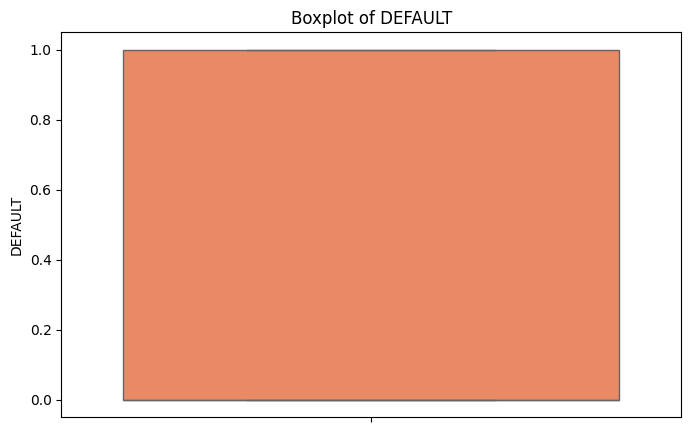

In [ ]:
# Boxplots for numerical variables (to detect outliers)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col, color="coral")
    plt.title(f"Boxplot of {col}")
    plt.show()

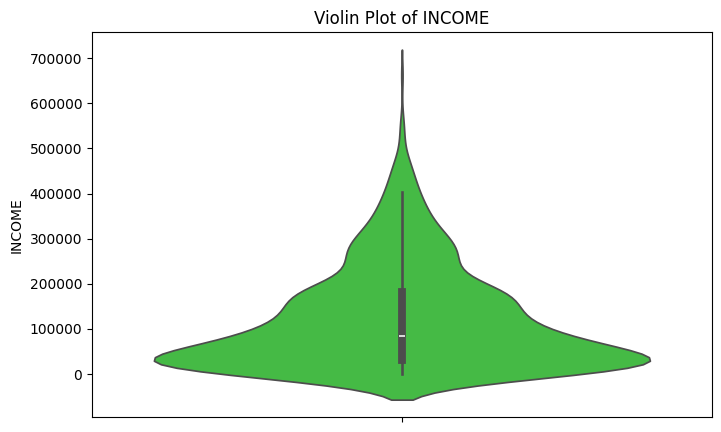

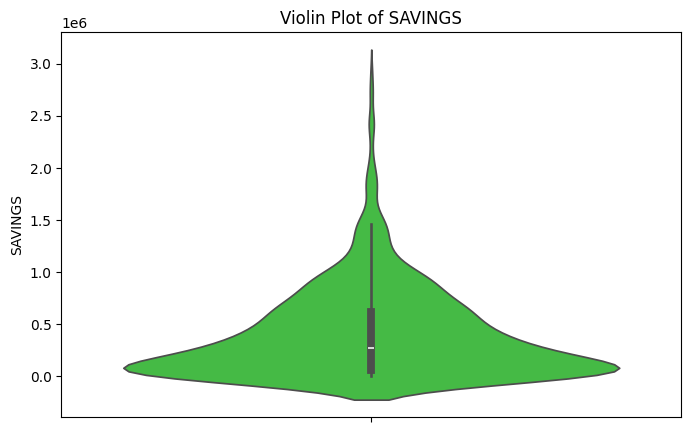

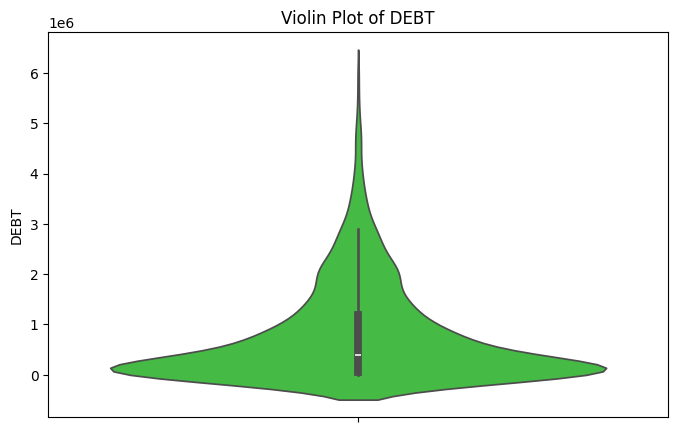

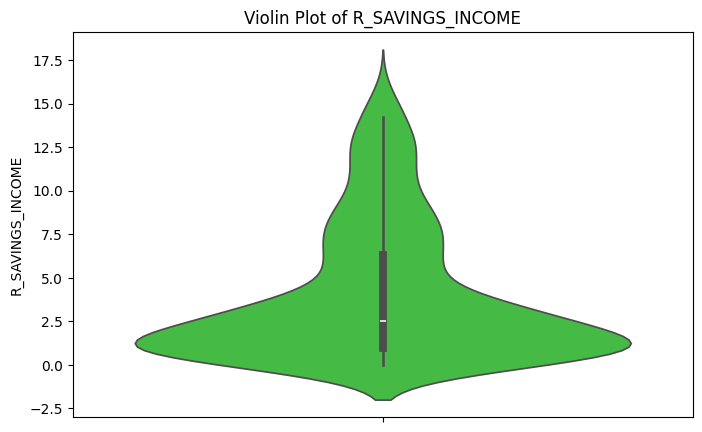

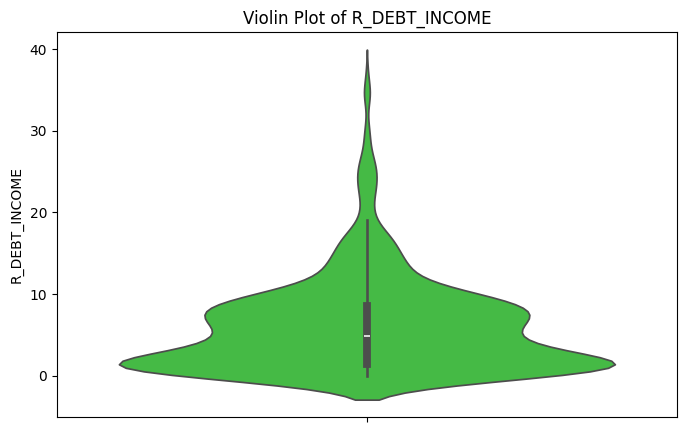

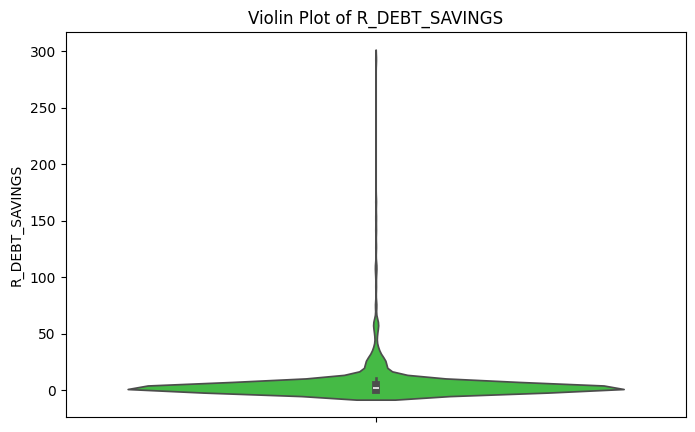

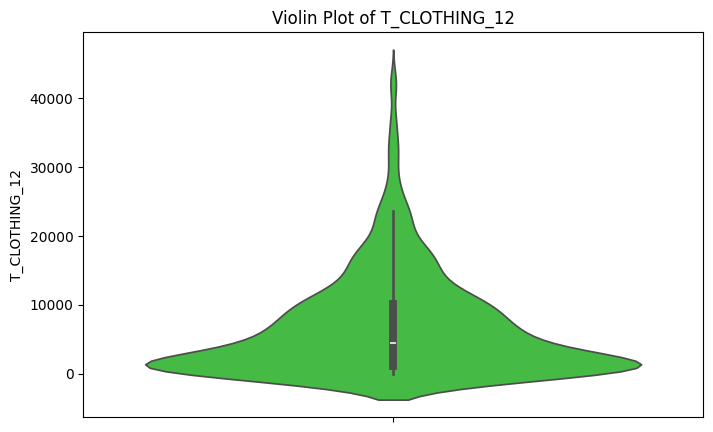

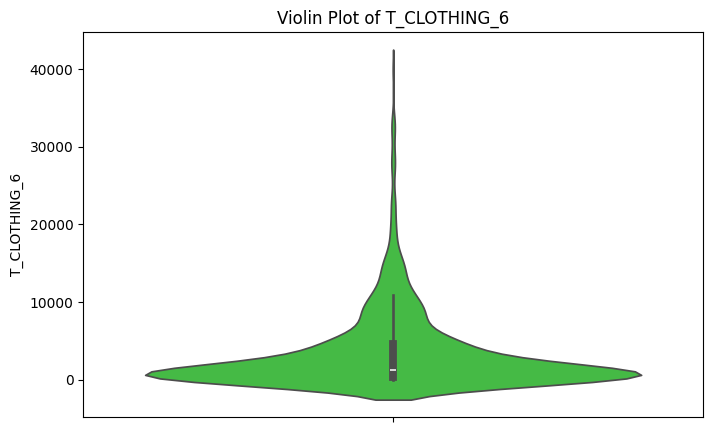

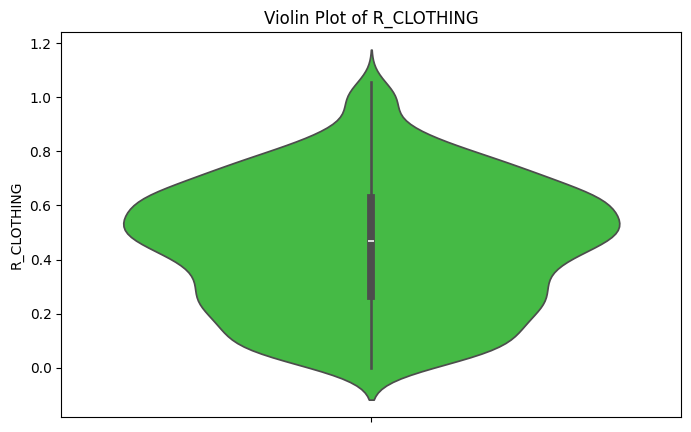

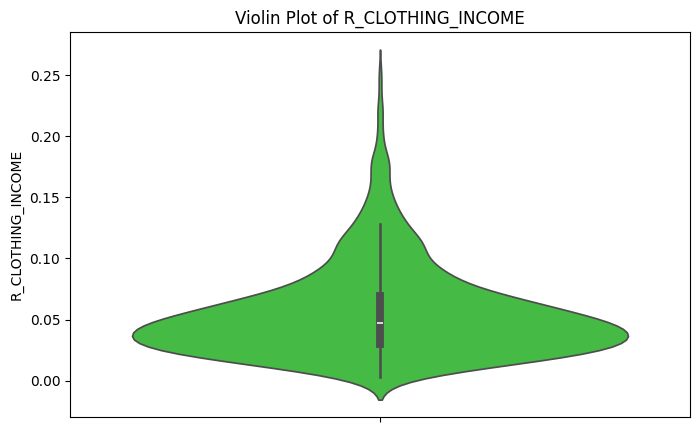

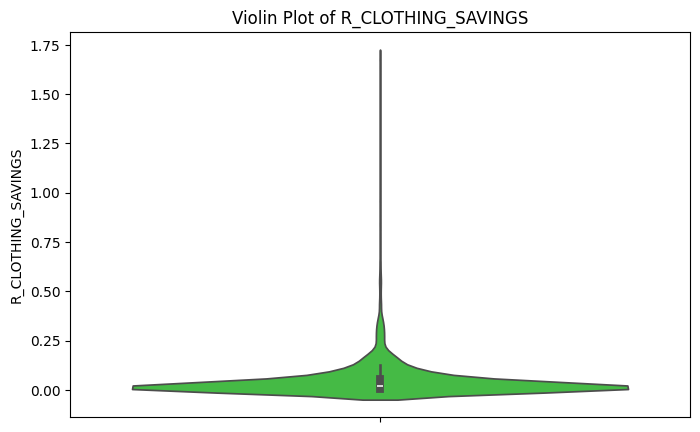

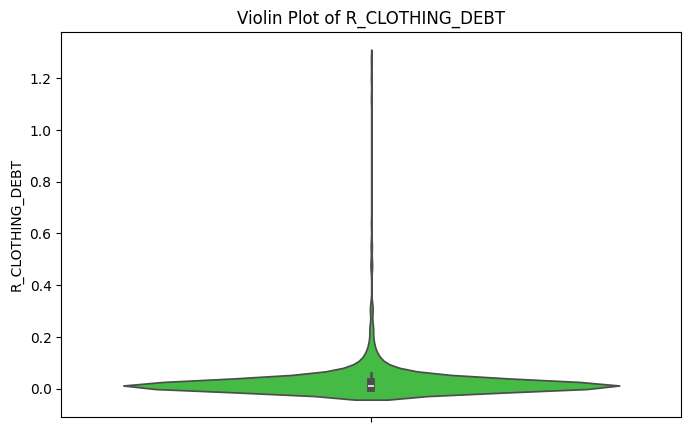

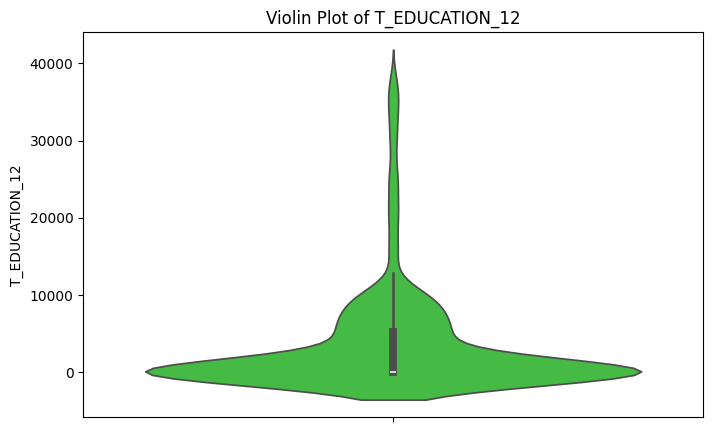

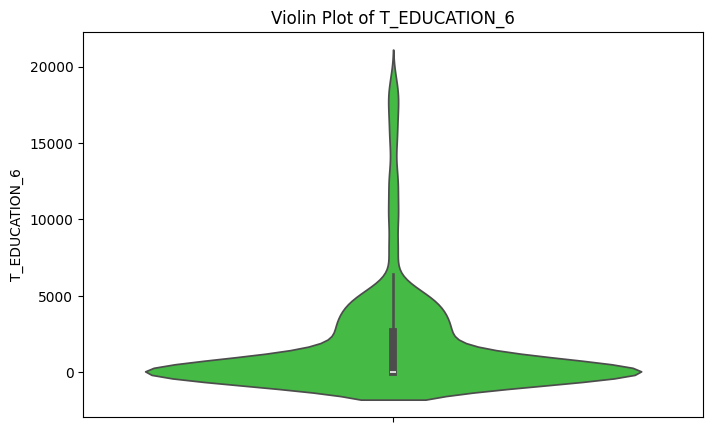

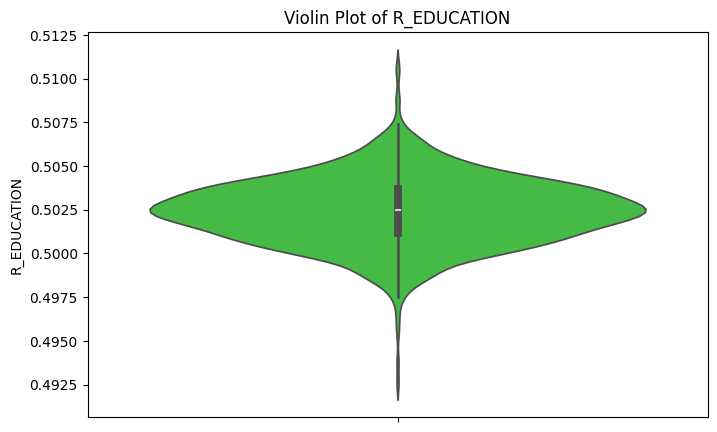

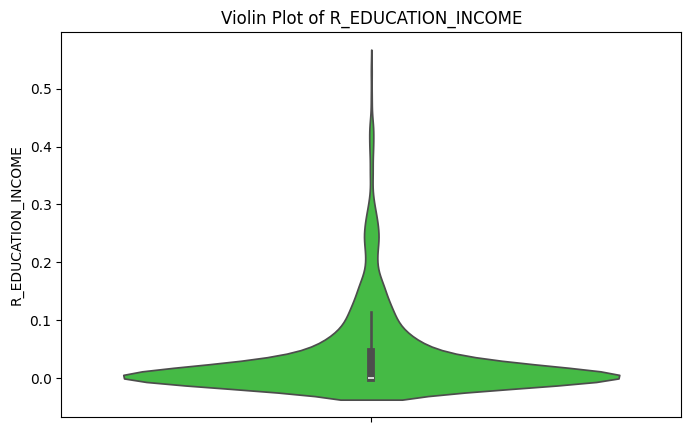

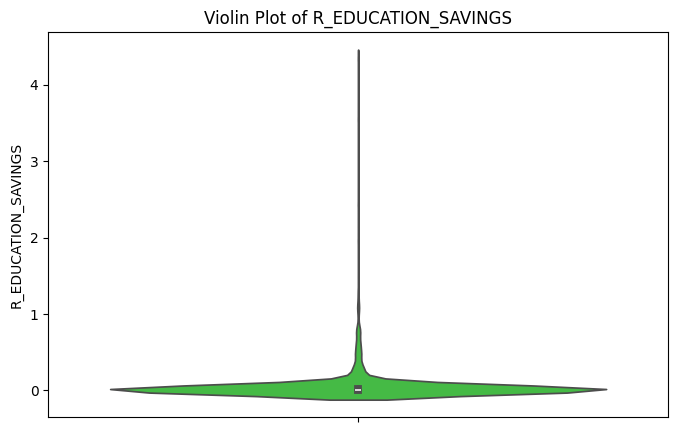

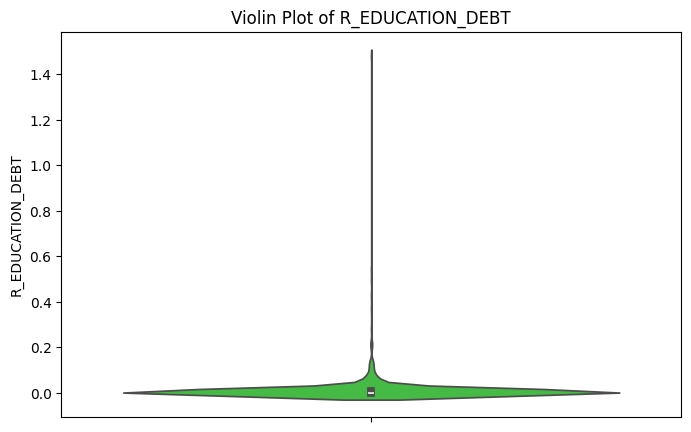

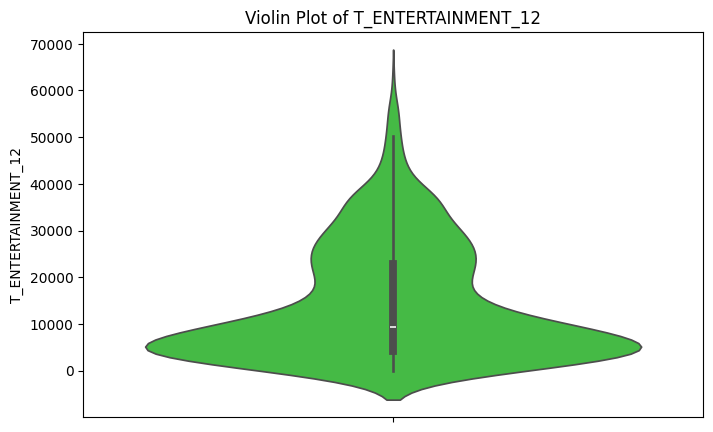

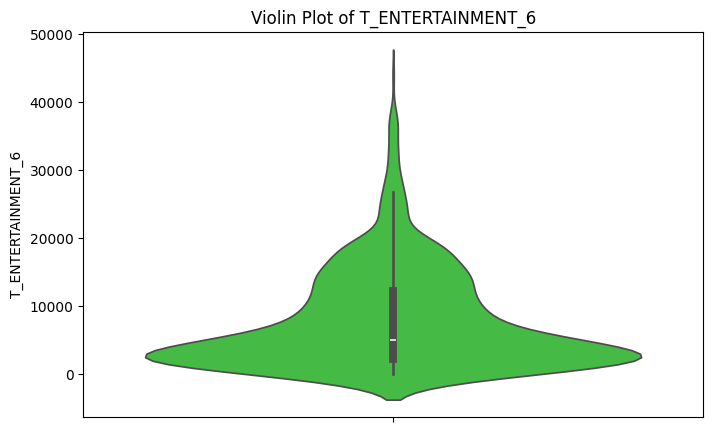

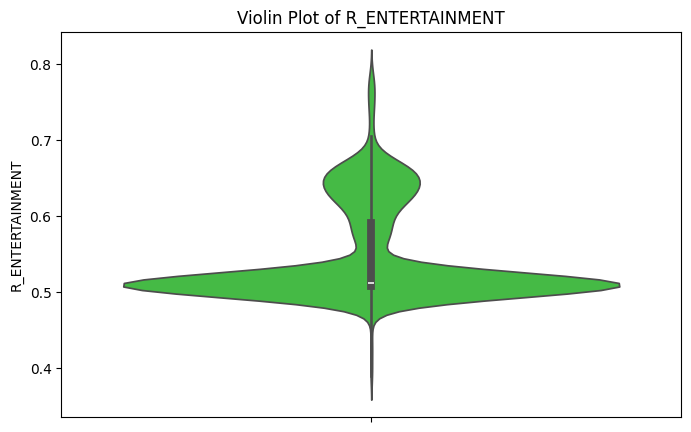

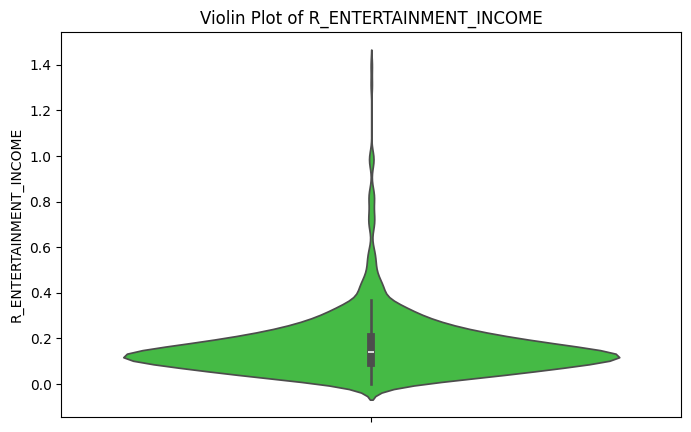

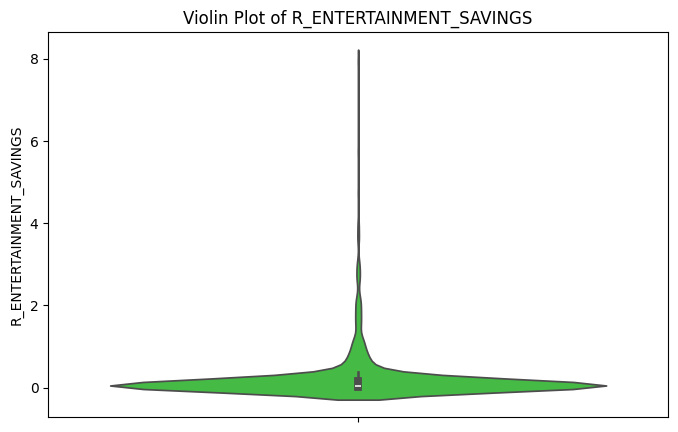

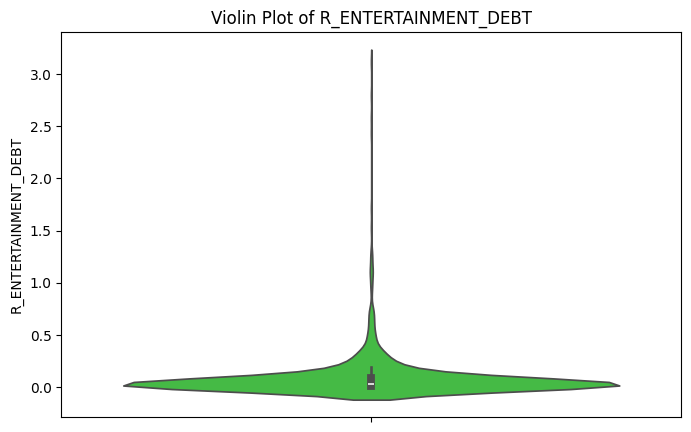

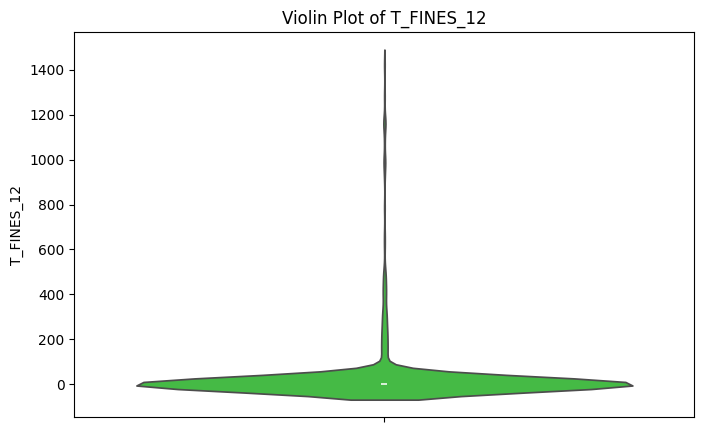

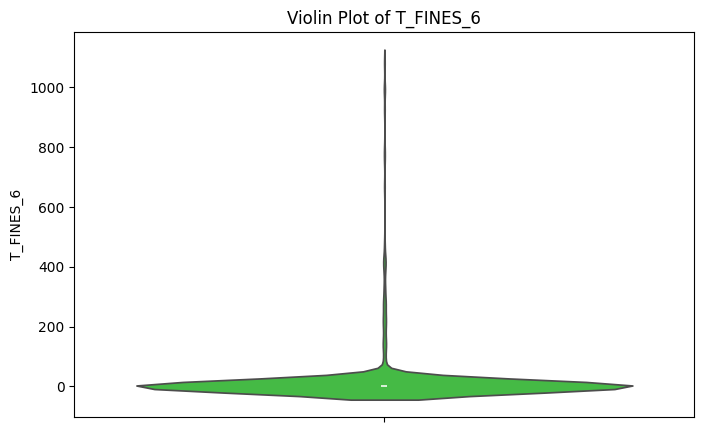

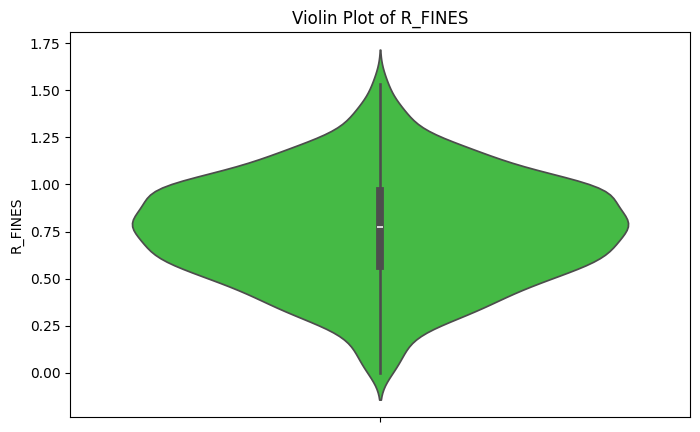

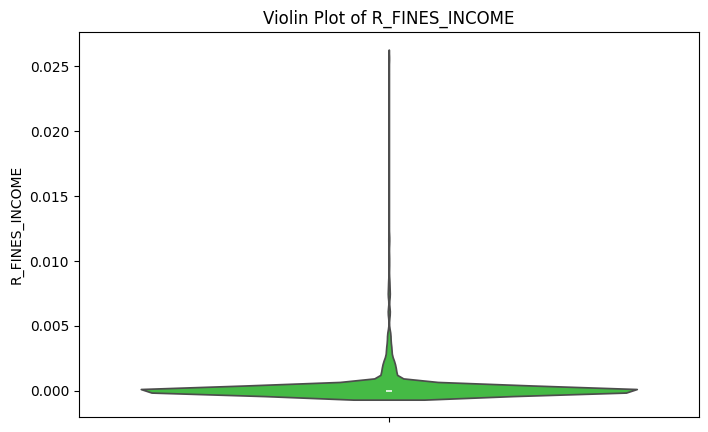

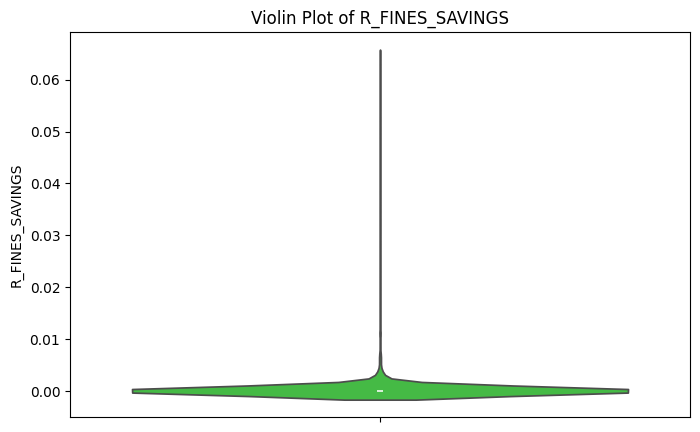

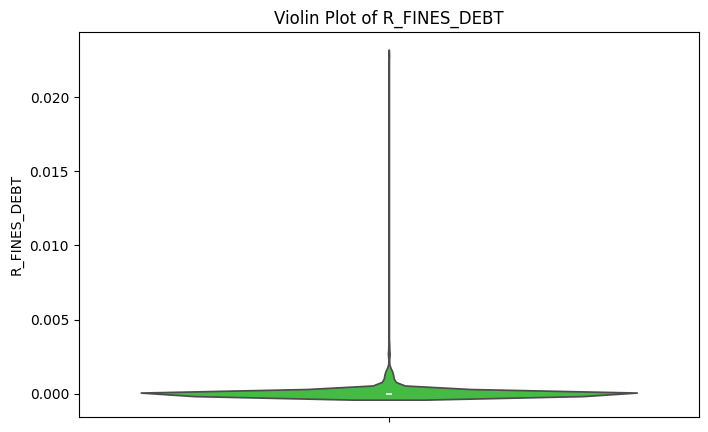

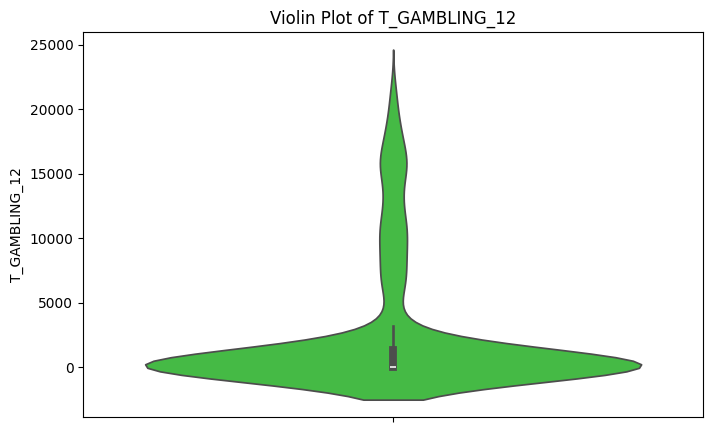

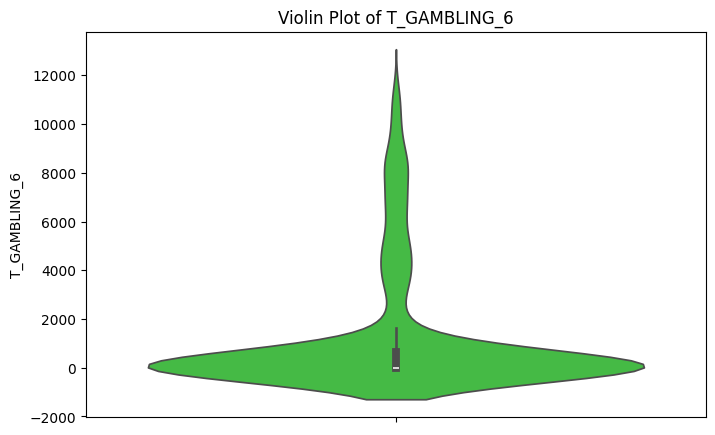

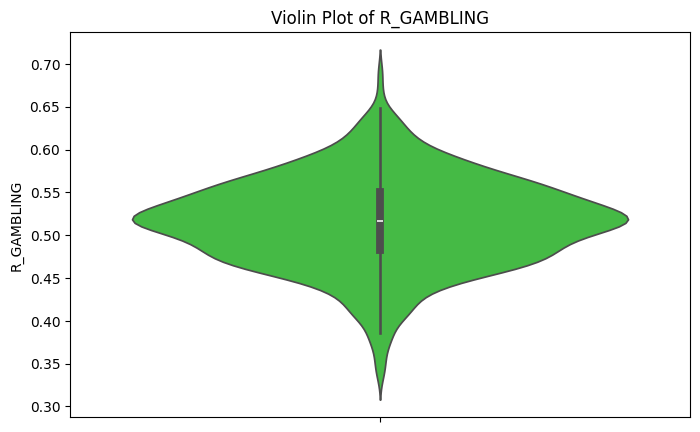

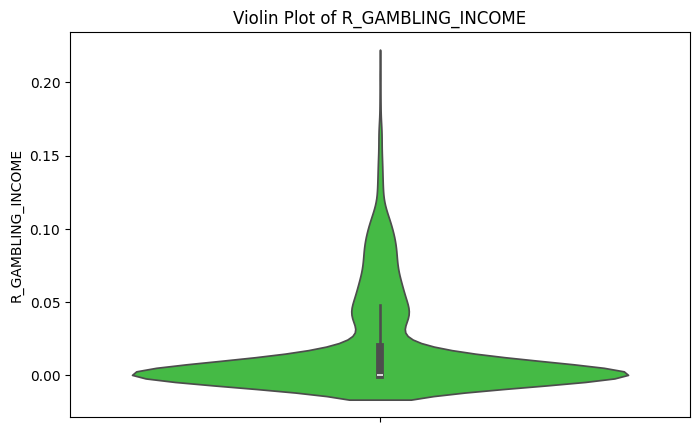

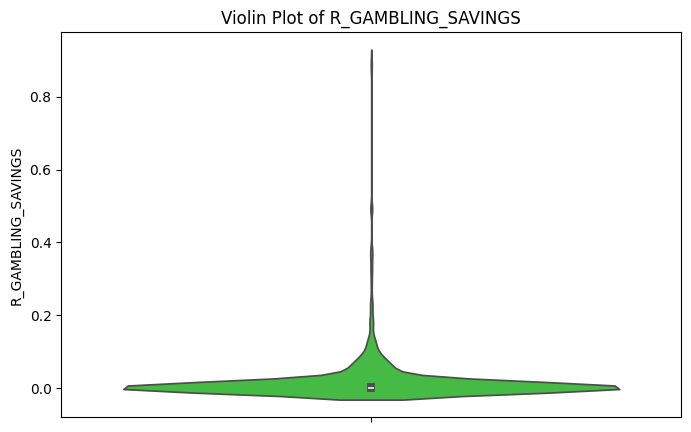

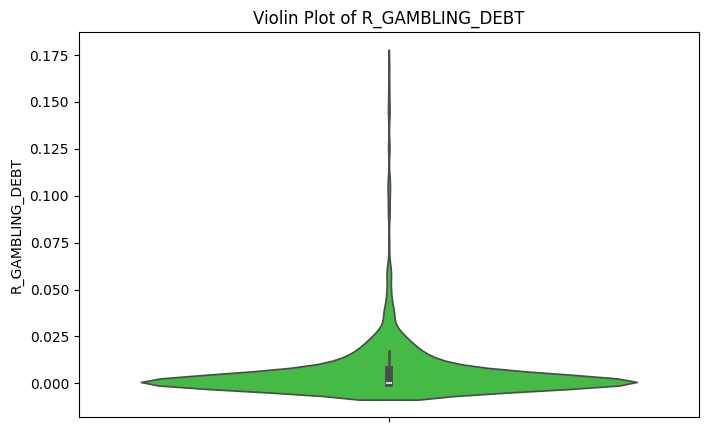

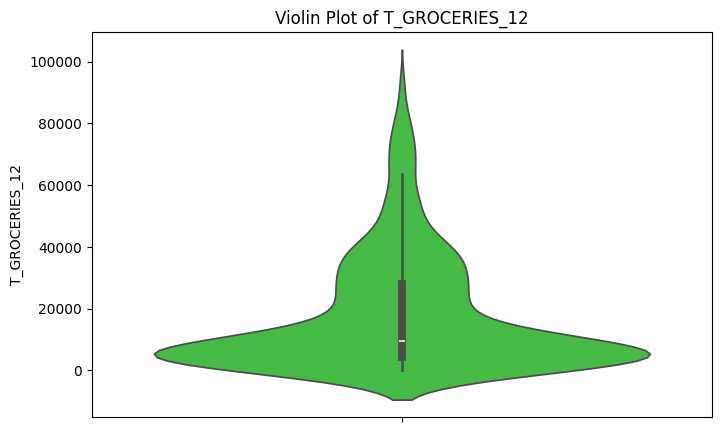

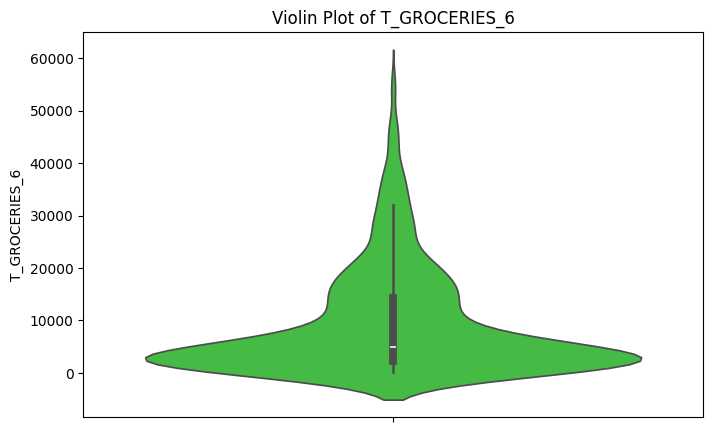

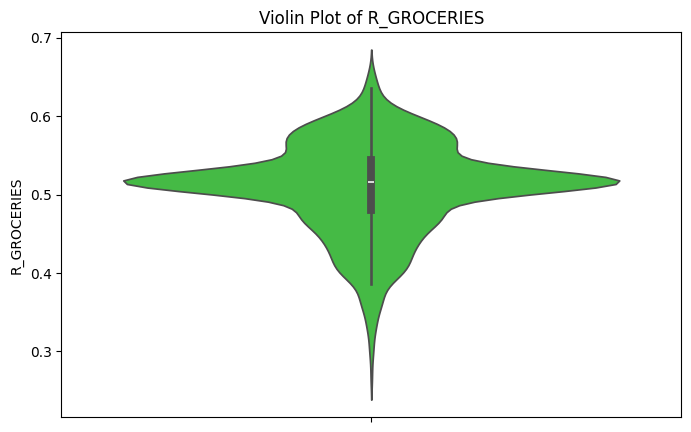

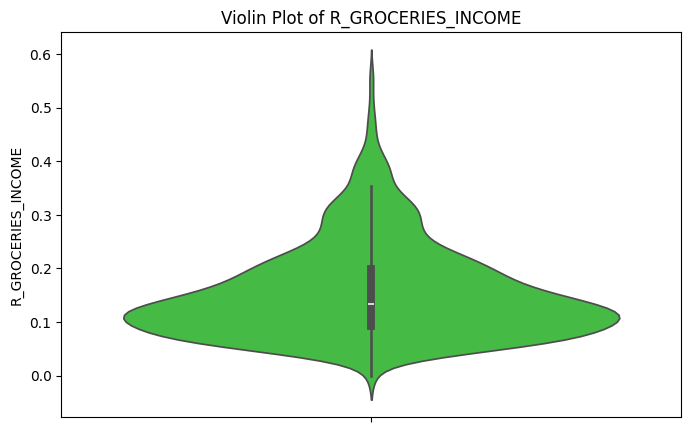

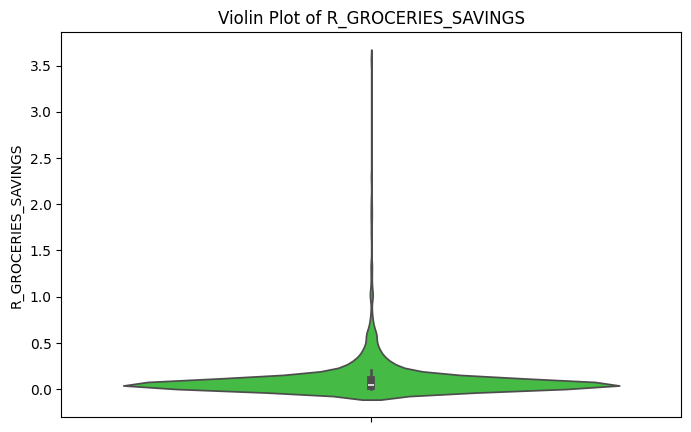

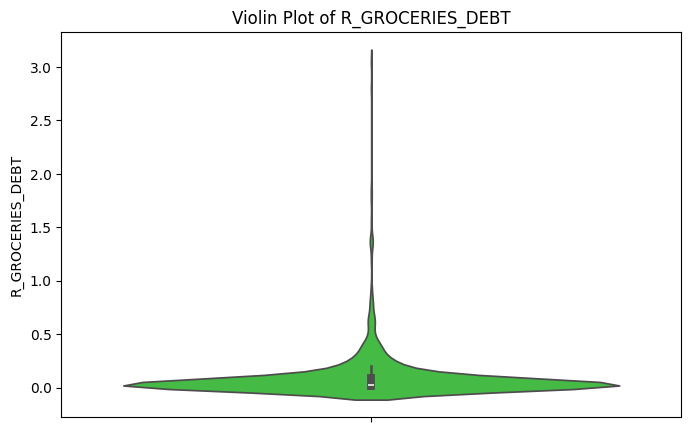

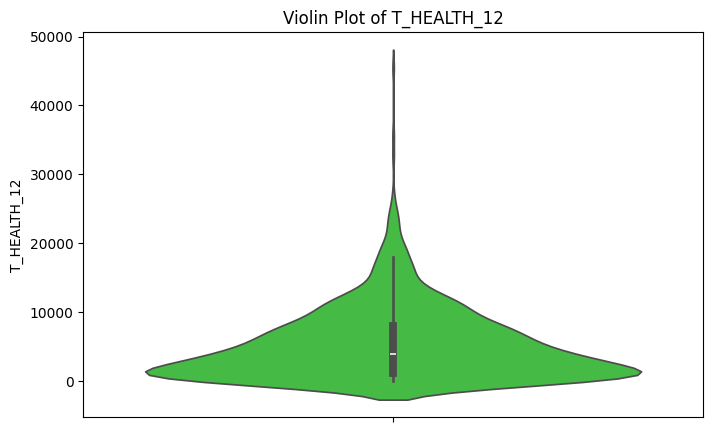

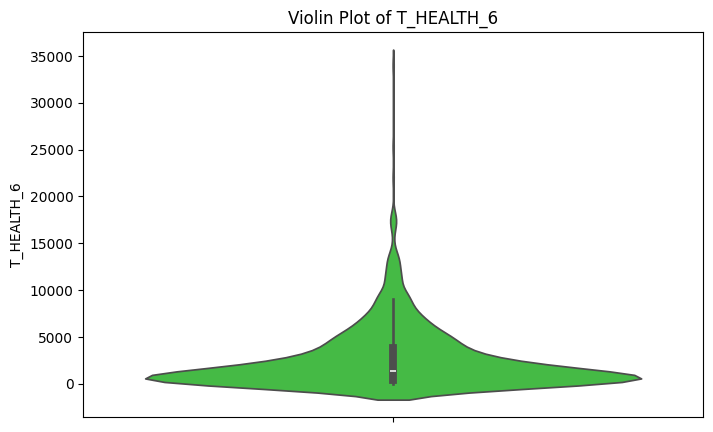

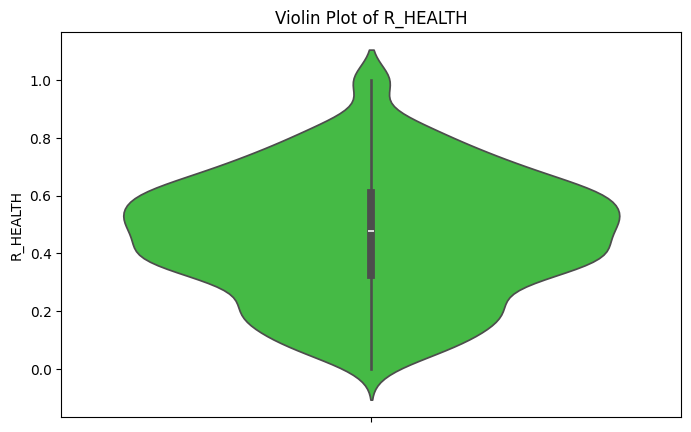

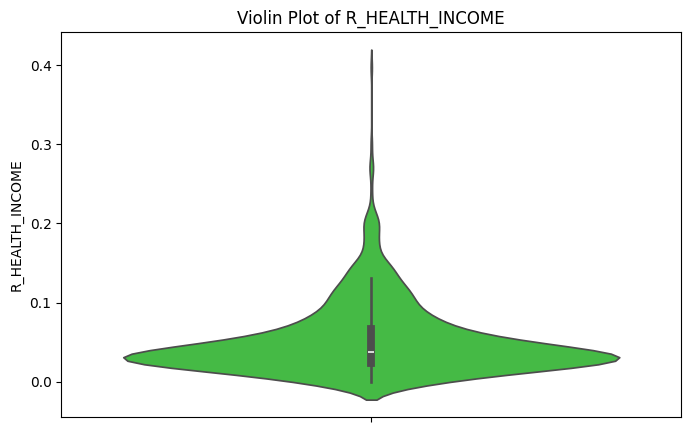

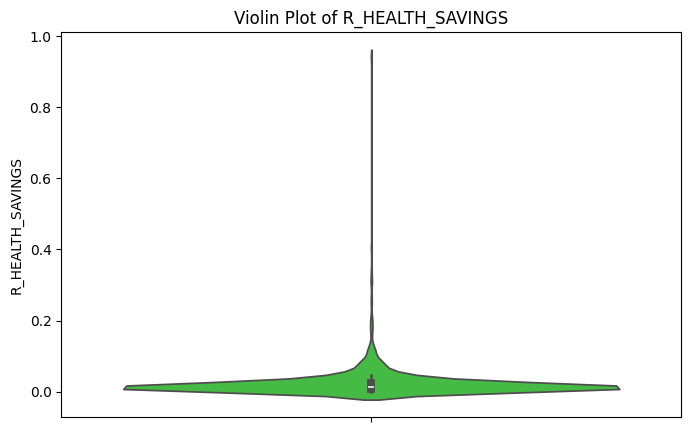

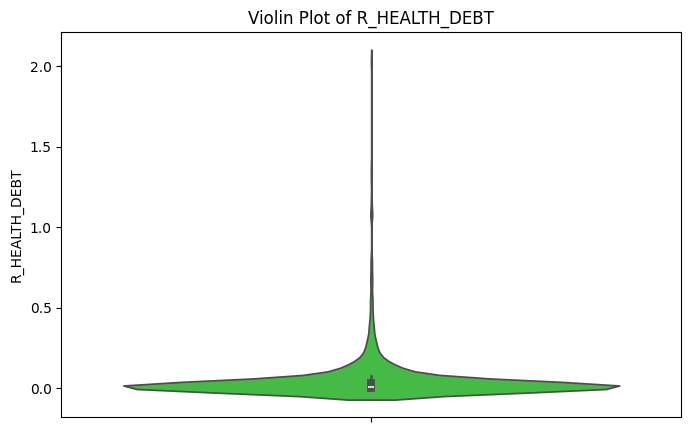

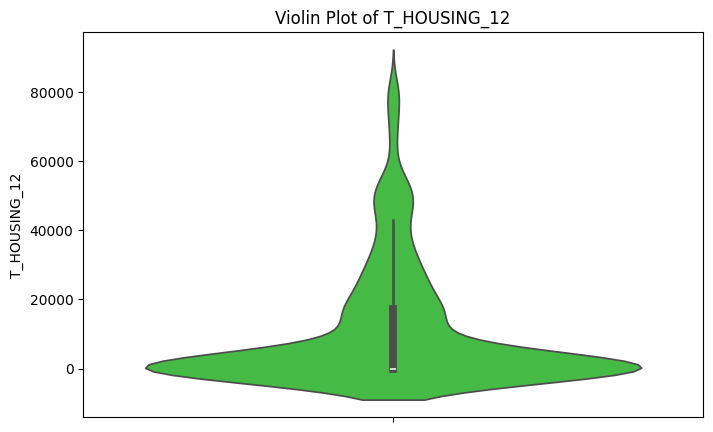

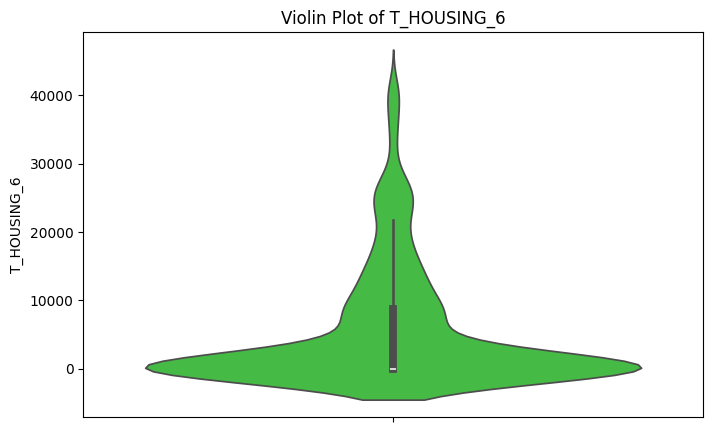

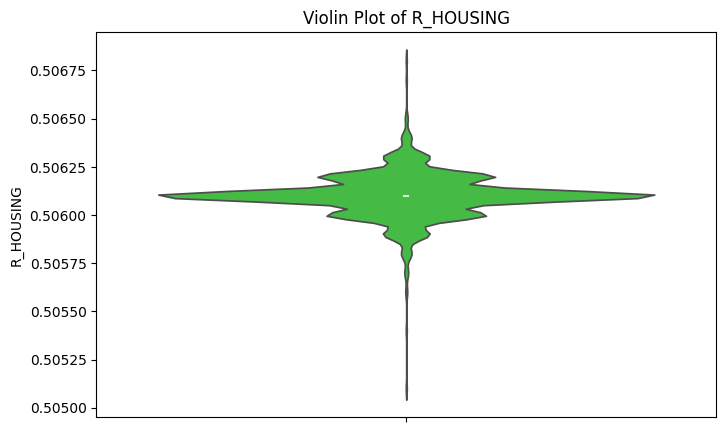

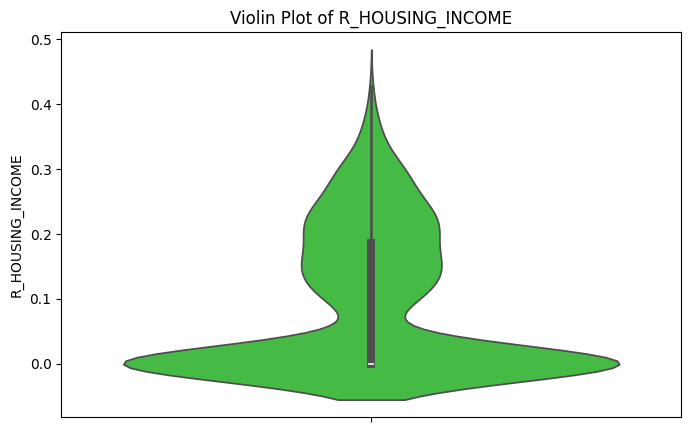

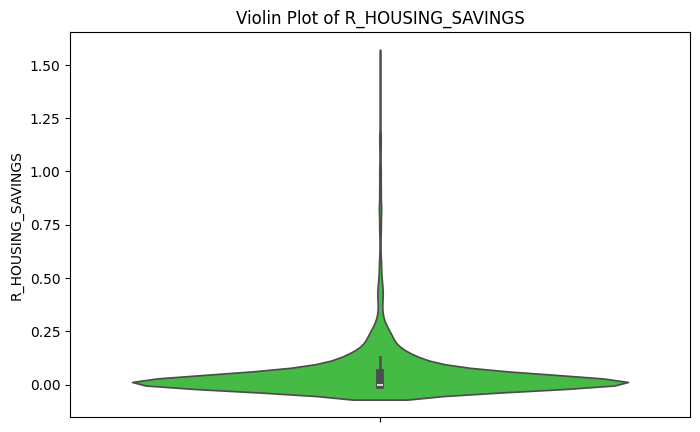

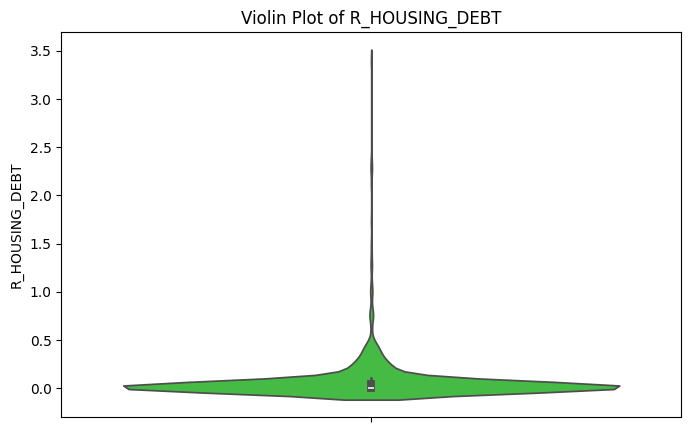

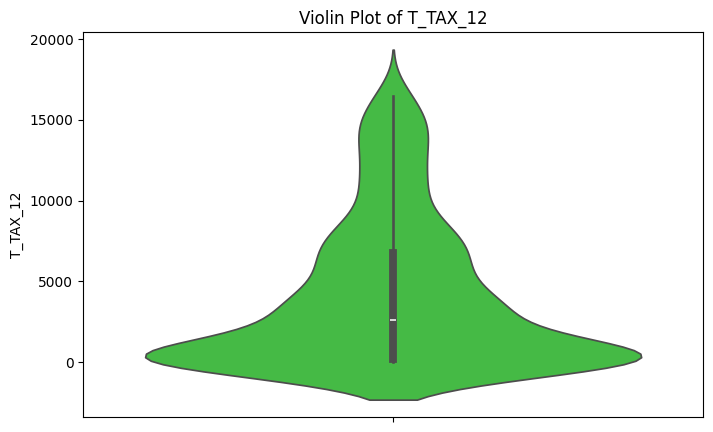

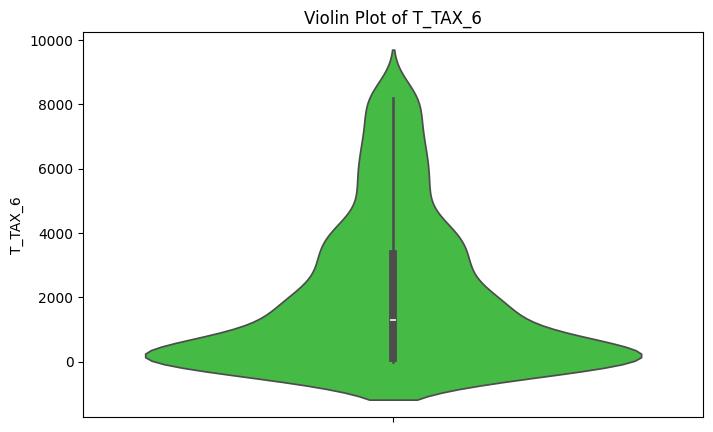

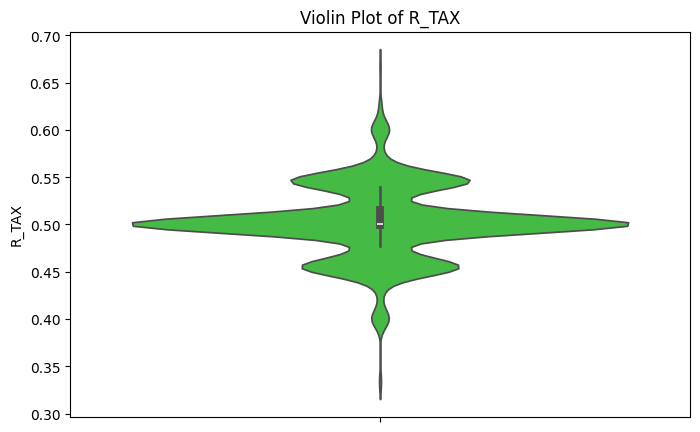

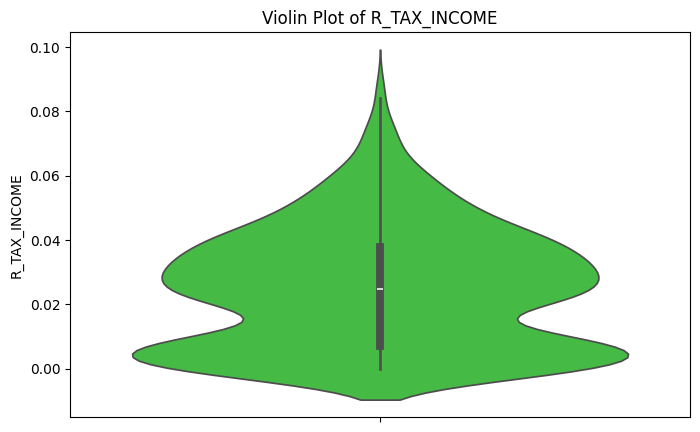

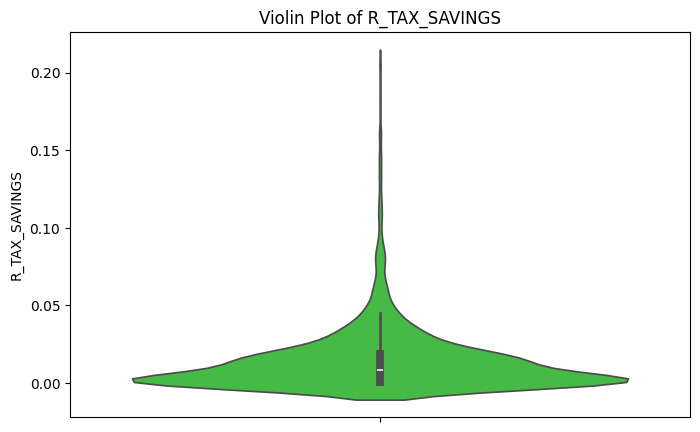

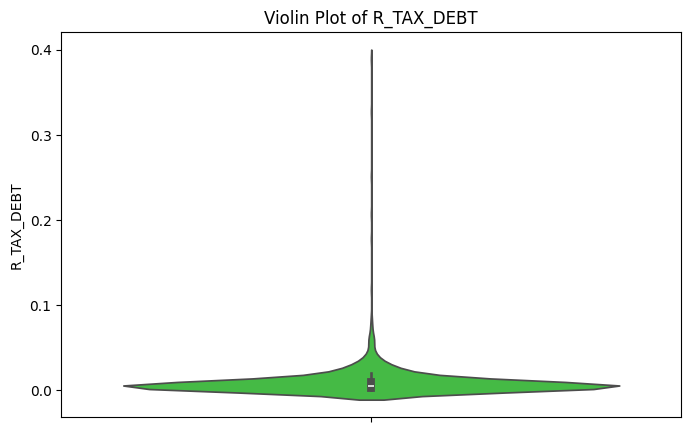

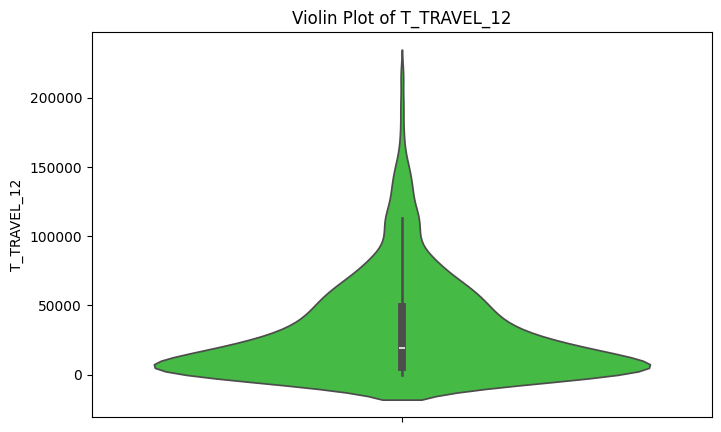

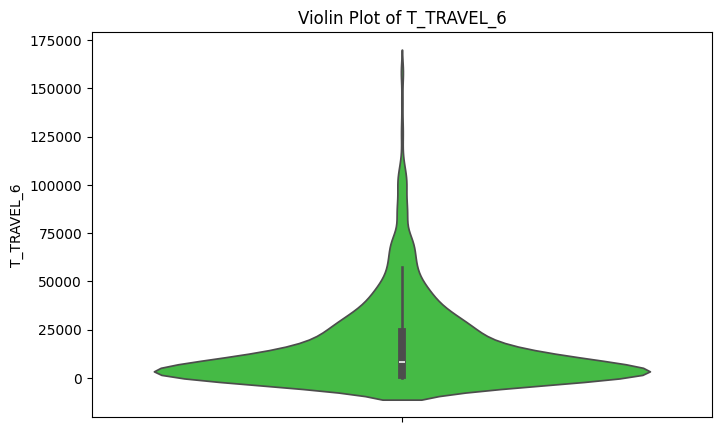

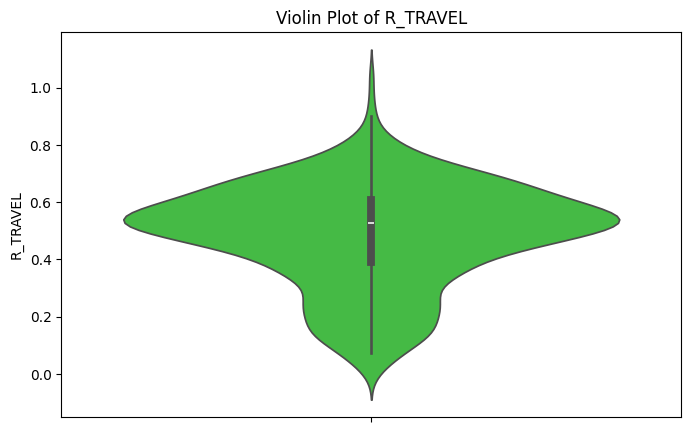

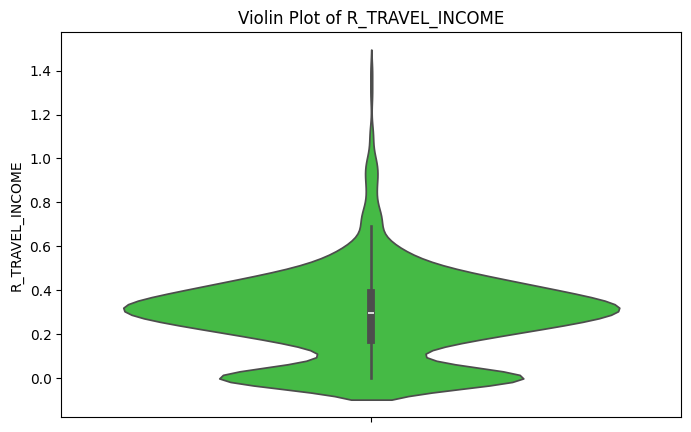

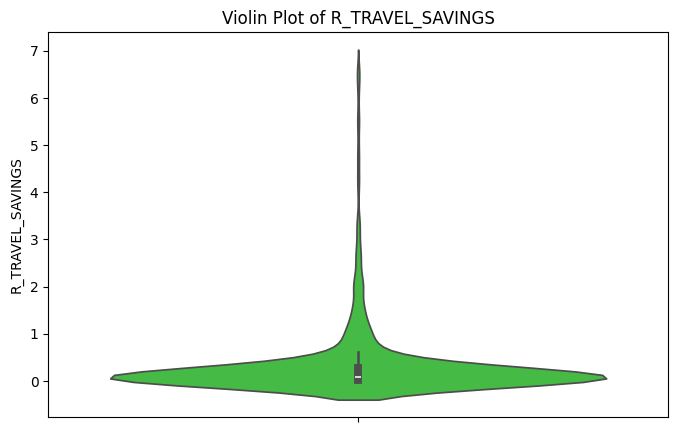

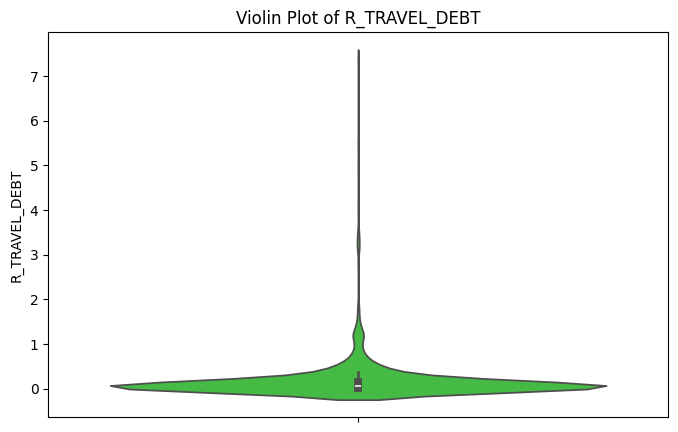

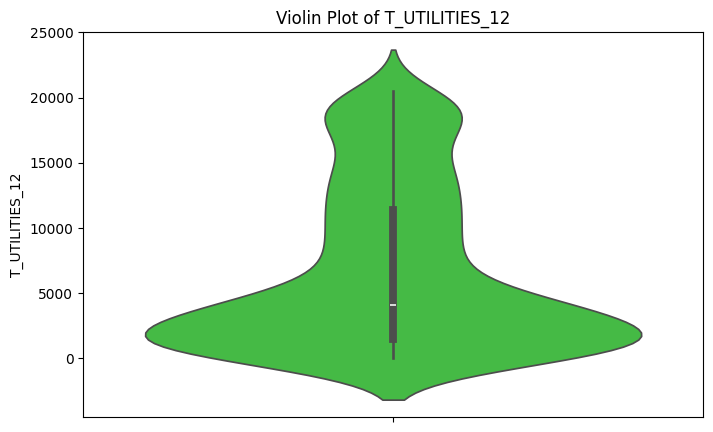

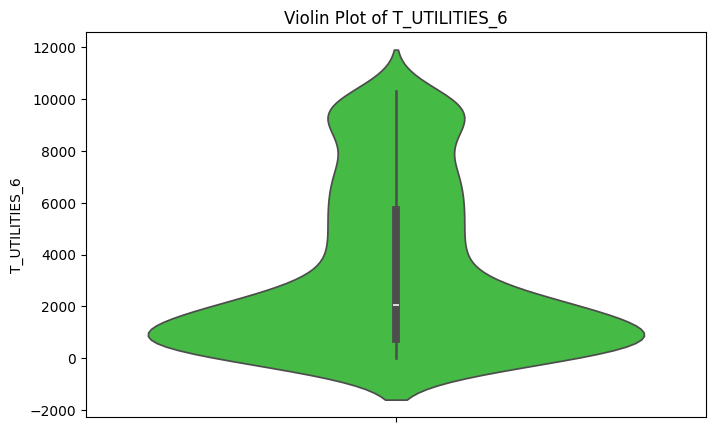

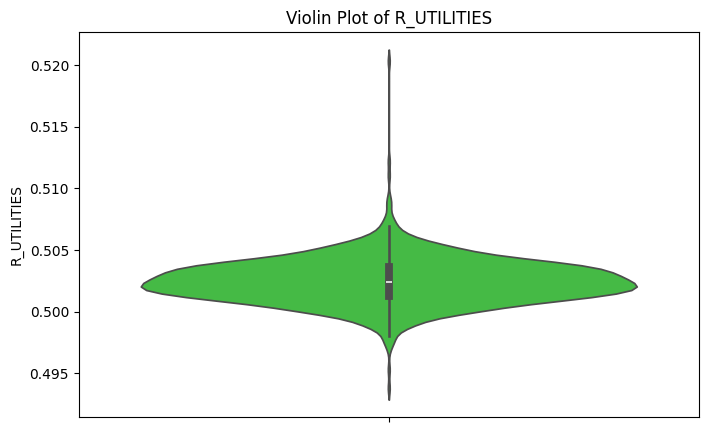

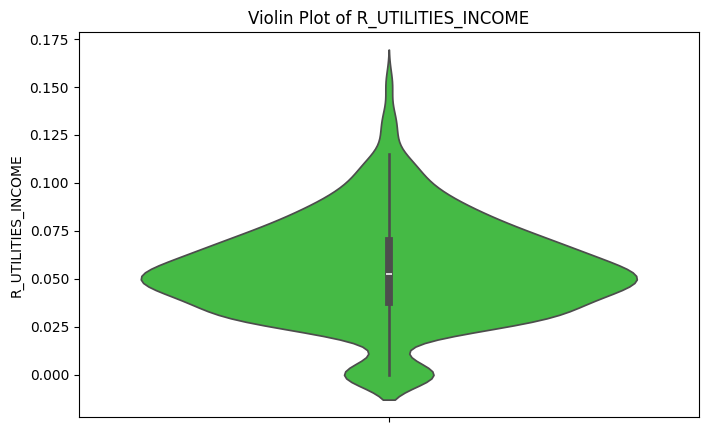

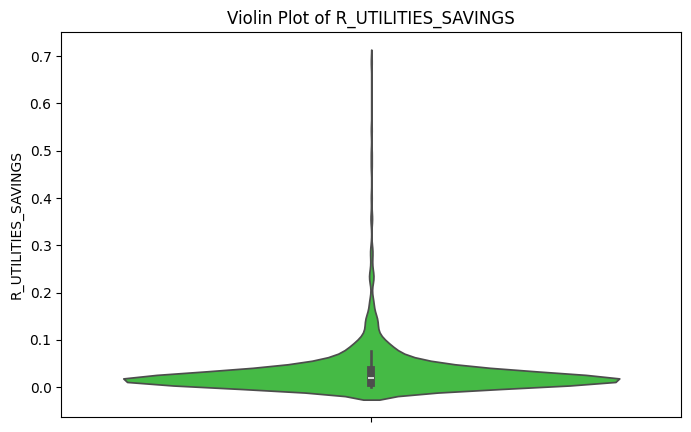

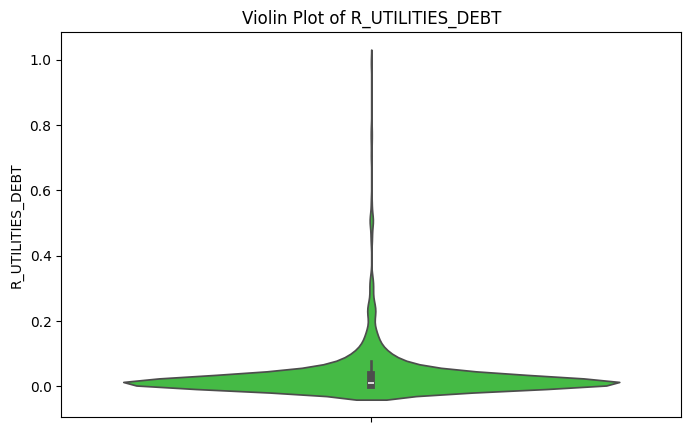

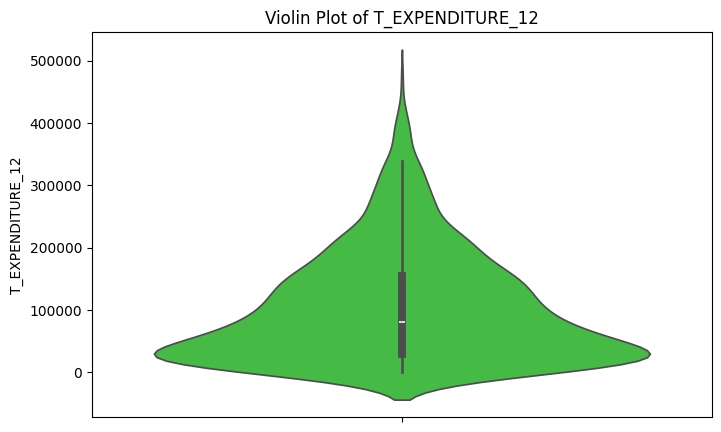

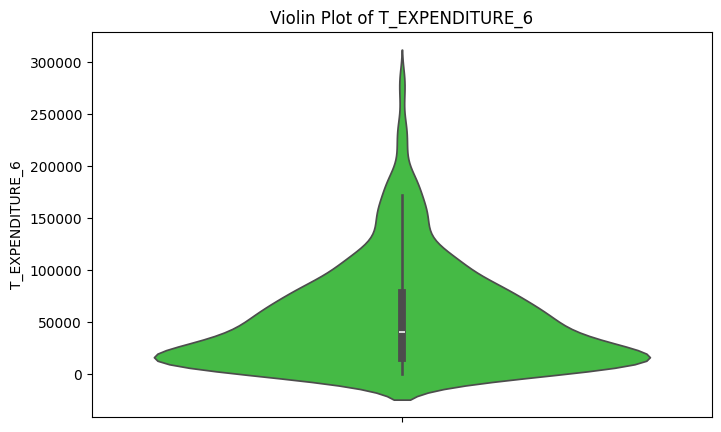

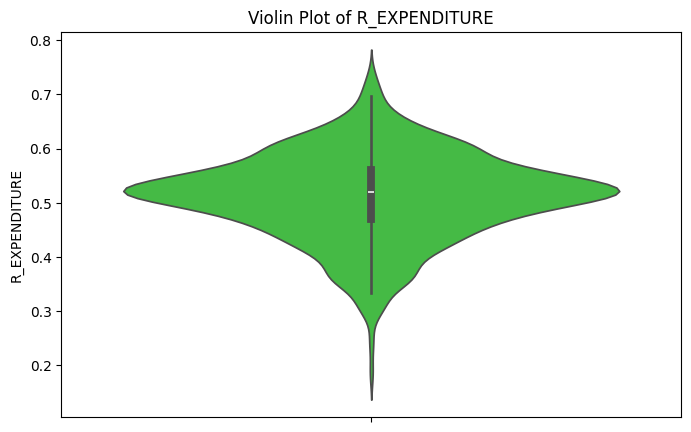

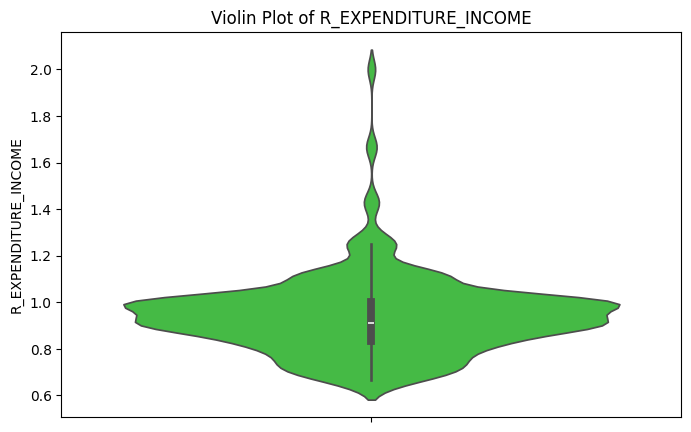

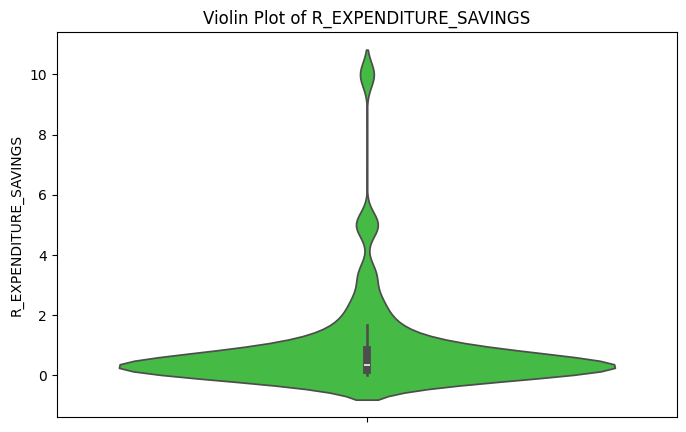

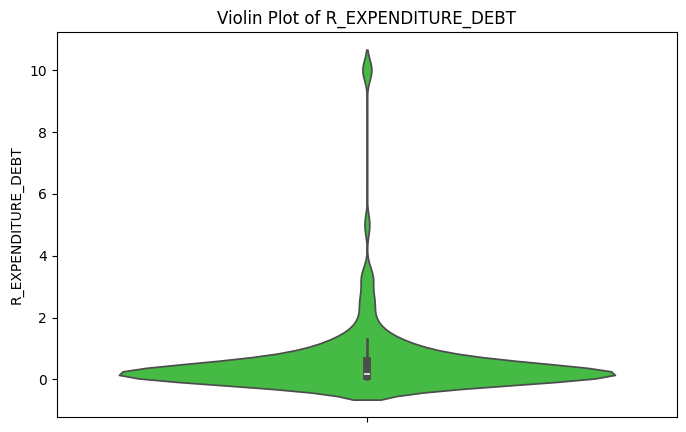

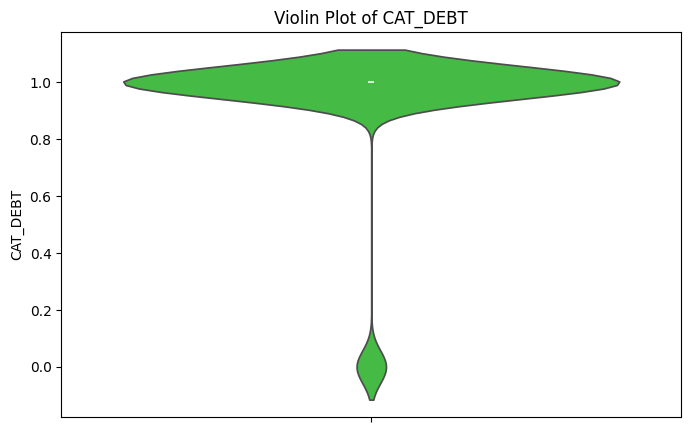

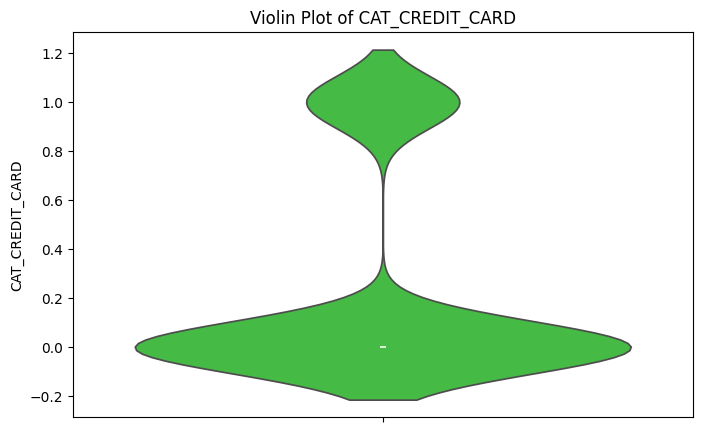

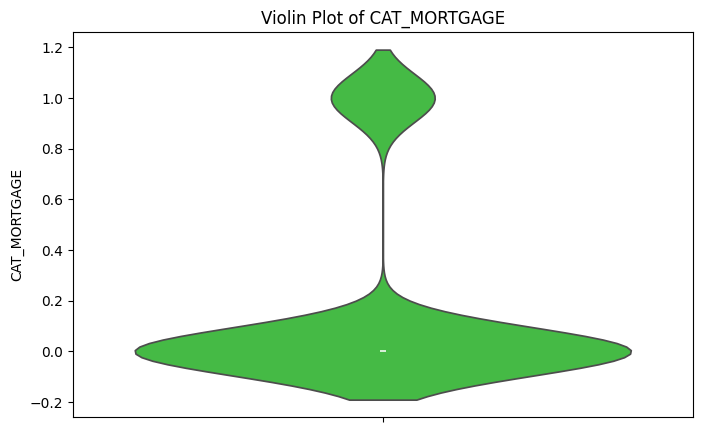

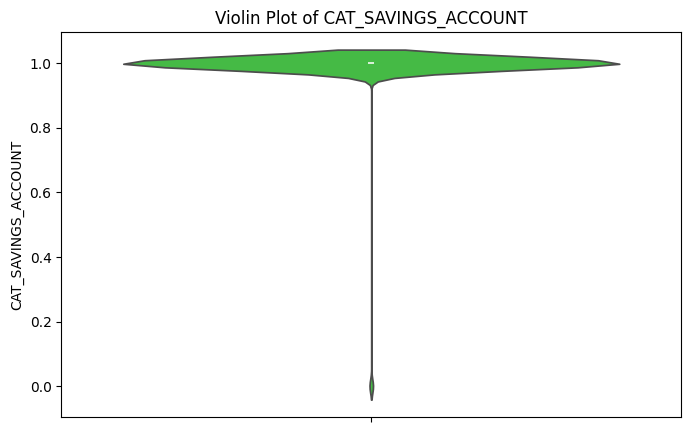

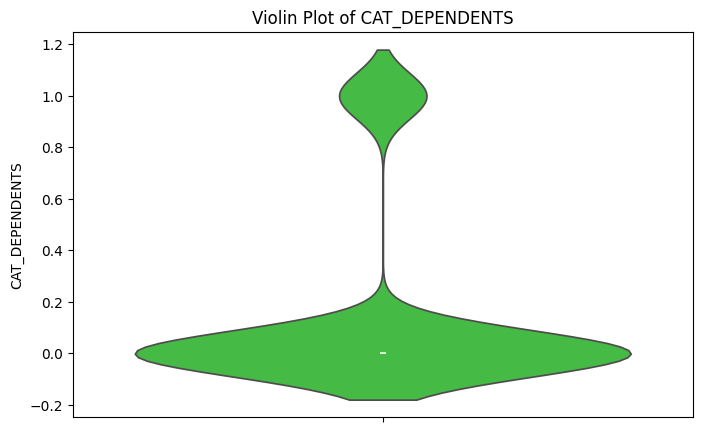

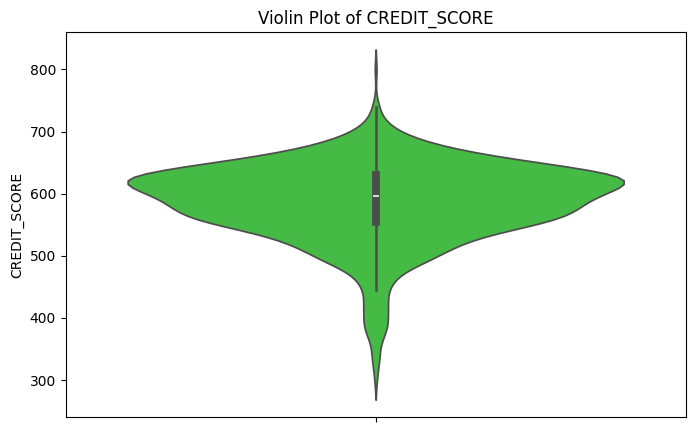

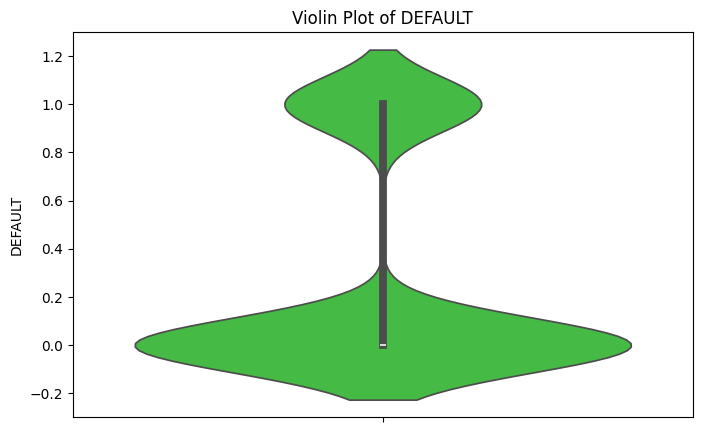

In [ ]:
# Violin plots for better understanding of distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, y=col, color="limegreen")
    plt.title(f"Violin Plot of {col}")
    plt.show()

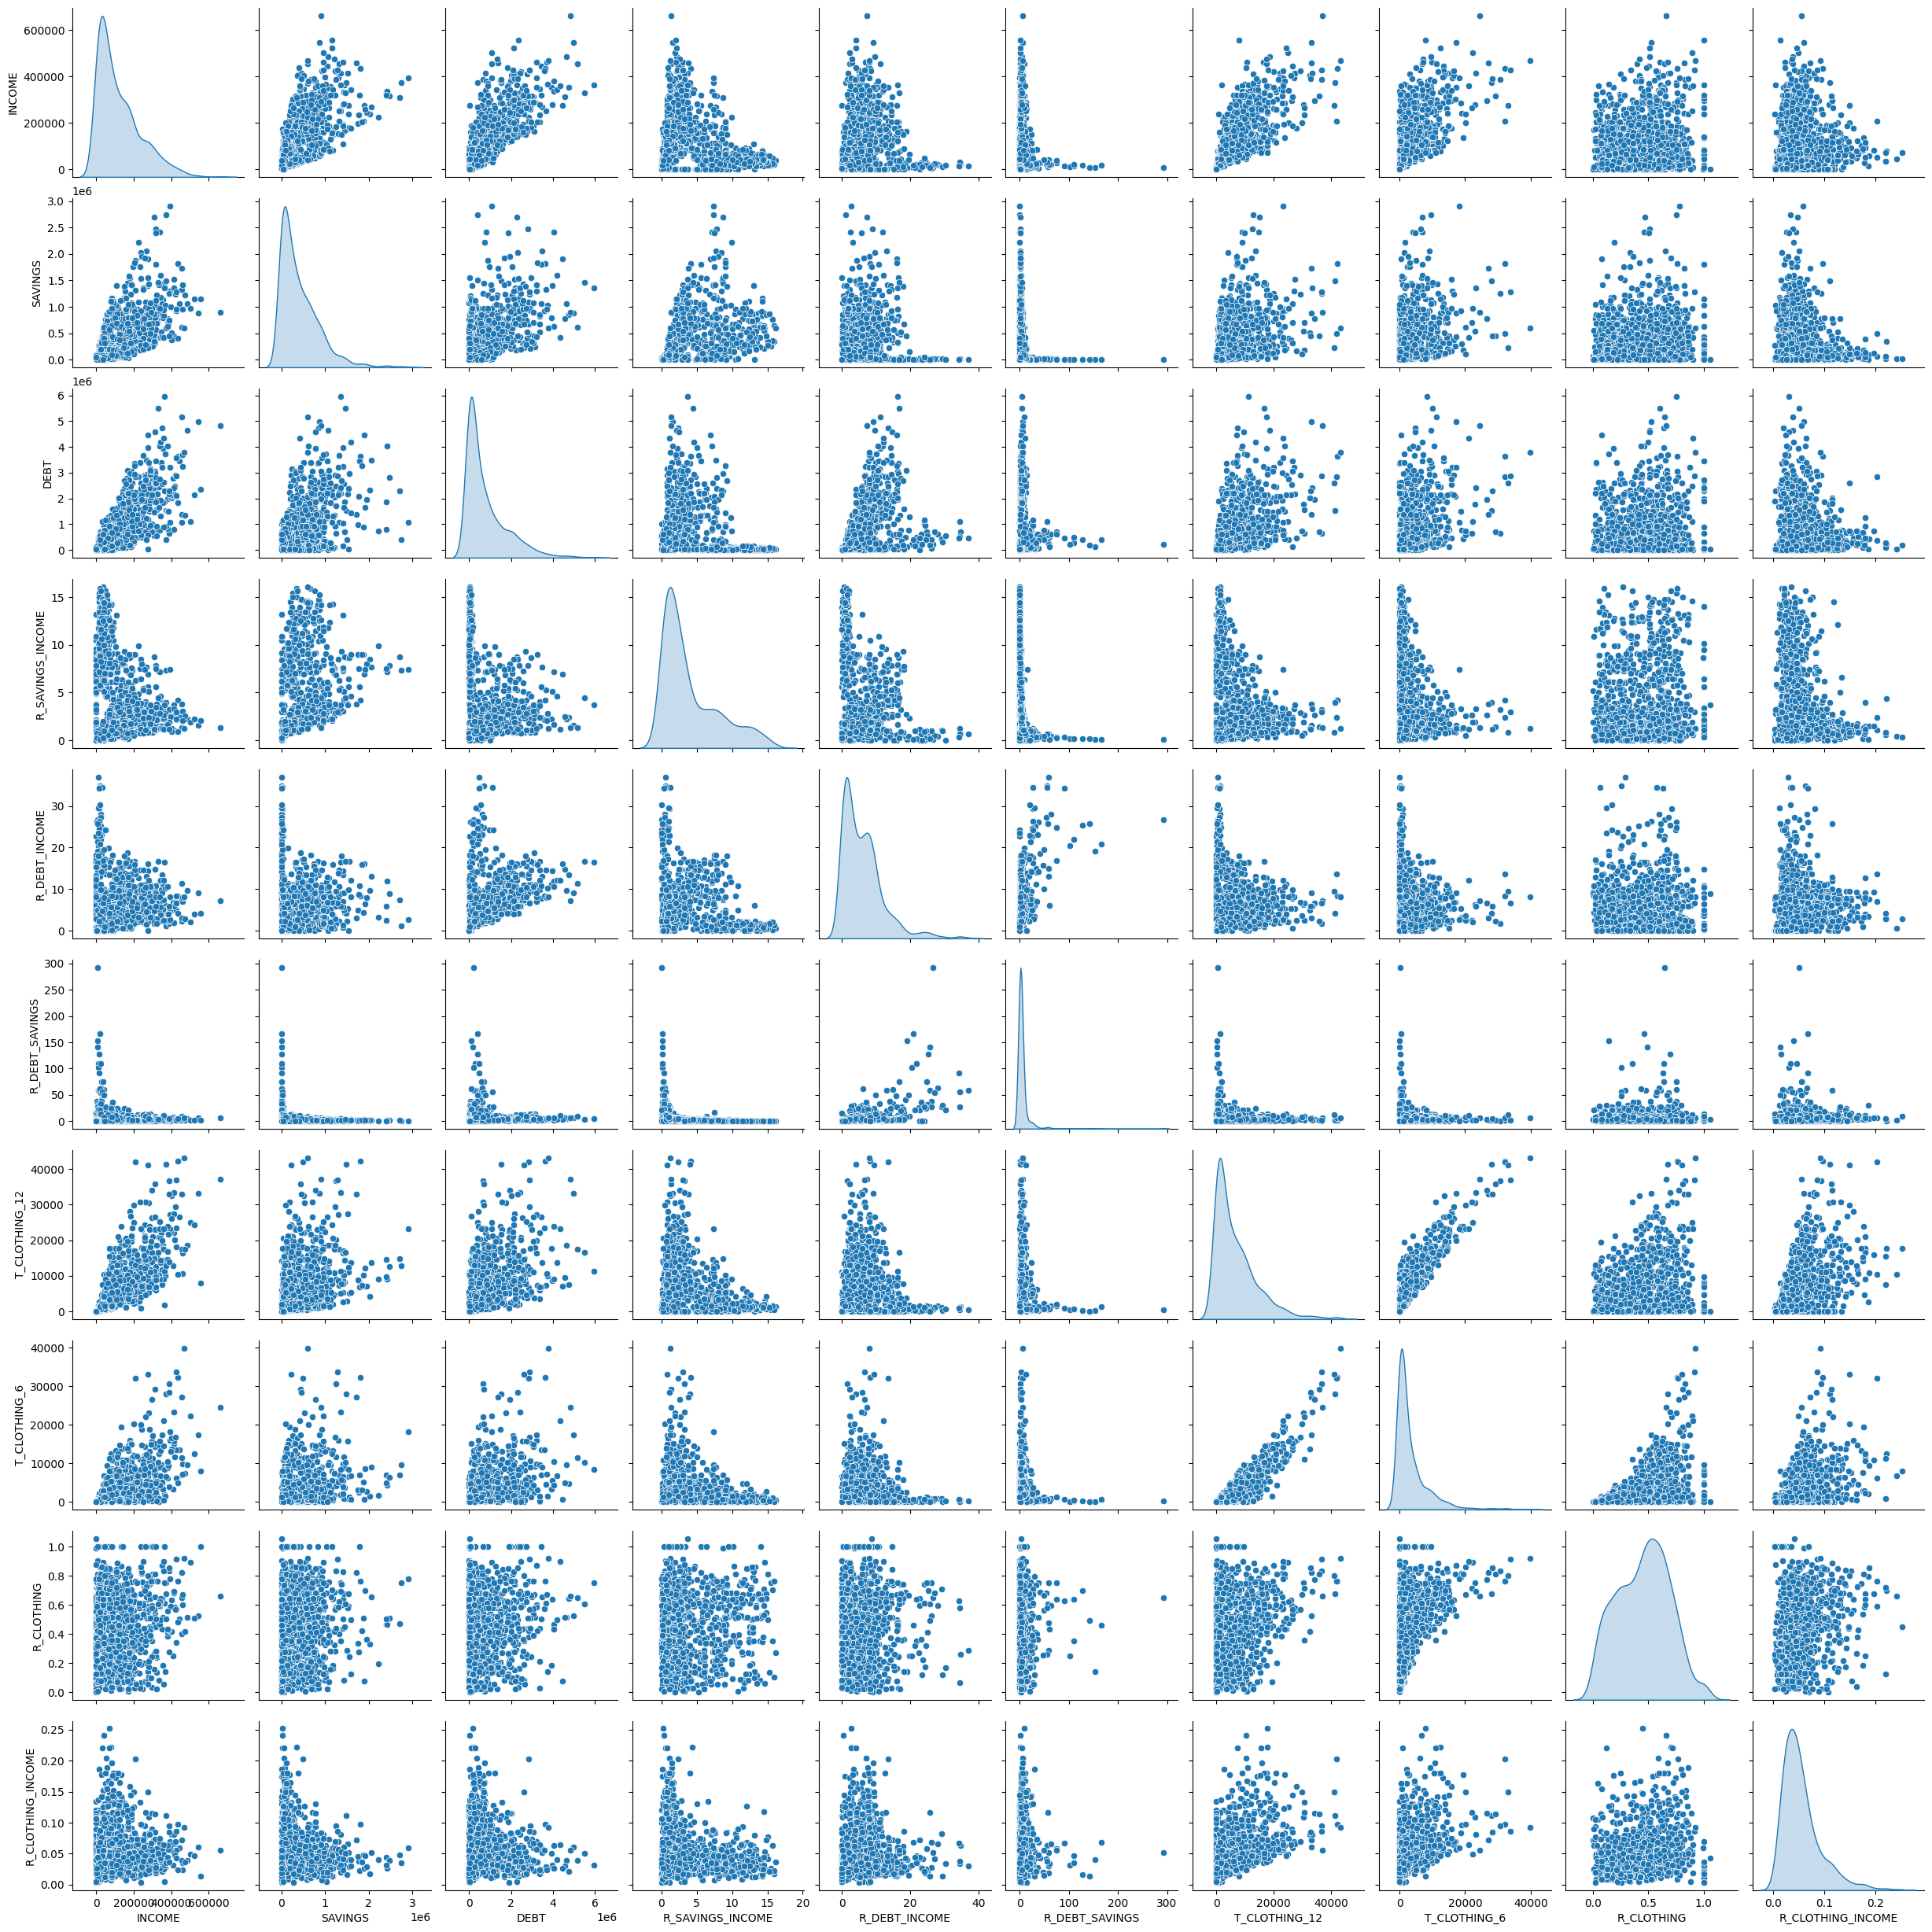

In [ ]:
# Pair plot to visualize feature relationships
sample_cols = numerical_cols[:10]
sns.pairplot(df[sample_cols], diag_kind='kde')
plt.show()

<ipython-input-13-c957f37c3696>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="DEFAULT", y="CREDIT_SCORE", palette="muted")
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


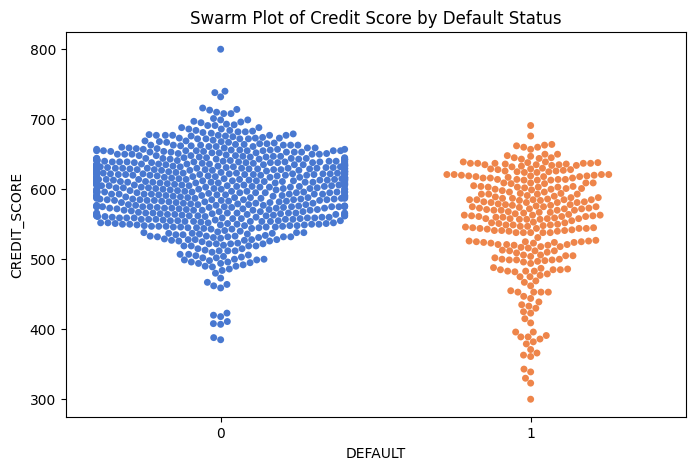

In [ ]:
# Swarm plots for category-wise numerical distribution (example: 'CREDIT_SCORE' vs 'DEFAULT')
if 'DEFAULT' in df.columns and 'CREDIT_SCORE' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.swarmplot(data=df, x="DEFAULT", y="CREDIT_SCORE", palette="muted")
    plt.title("Swarm Plot of Credit Score by Default Status")
    plt.show()

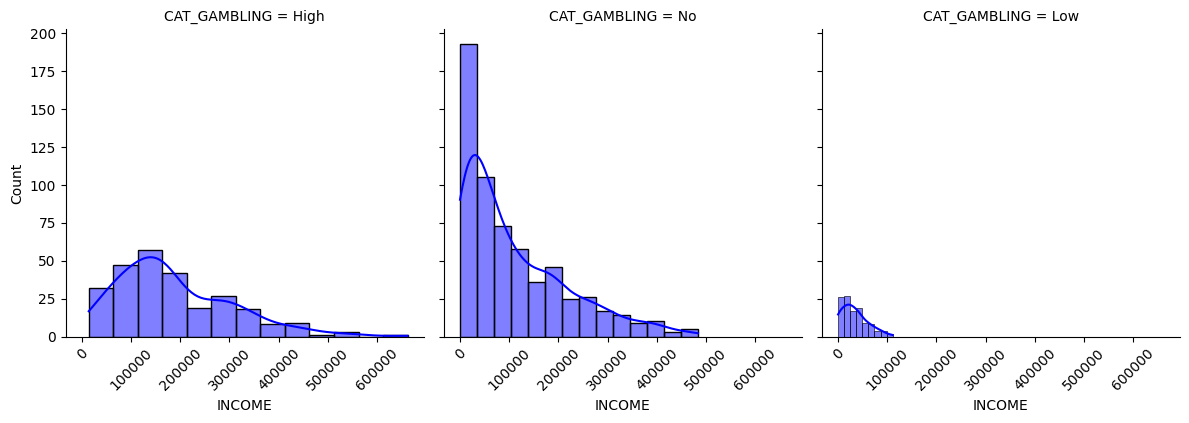

In [ ]:
if 'CAT_GAMBLING' in df.columns:
    g = sns.FacetGrid(df, col="CAT_GAMBLING", height=4, aspect=1)
    g.map(sns.histplot, "INCOME", kde=True, color="blue")

    # Rotate x-axis labels
    for ax in g.axes.flat:
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    plt.show()


In [ ]:


# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Scale numeric features
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['number']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:


# Separate features and target variable
X = df.drop(columns=['DEFAULT'])
y = df['DEFAULT']

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_ENTERTAINMENT_DEBT',
       'R_GROCERIES_DEBT', 'R_HEALTH_DEBT', 'R_TAX_DEBT', 'R_UTILITIES_DEBT',
       'R_EXPENDITURE_DEBT', 'CAT_CREDIT_CARD', 'CREDIT_SCORE'],
      dtype='object')


In [ ]:
df['DEFAULT'] = df['DEFAULT'].astype(int)


In [ ]:
df.head()

CUST_ID    INCOME   SAVINGS      DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0 -1.730320 -0.777240 -0.933351 -0.263339         -1.024549       1.699167   
1 -1.726856 -0.391097 -0.727370 -0.484123         -0.726575      -0.338334   
2 -1.723391 -0.797934 -0.884465 -0.260730         -0.848054       1.921581   
3 -1.719927 -0.360312 -0.787594 -0.164673         -0.822840       0.296247   
4 -1.716463  0.249525  1.715197  1.639472          0.946701       1.699167   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0       -0.278144      -0.659327     -0.492793    0.192660  ...   
1       -0.143371      -0.134234     -0.655799   -1.847030  ...   
2        1.123182      -0.757155     -0.509407    1.222678  ...   
3        0.231386       0.004624      0.042937    0.350766  ...   
4       -0.227697      -0.647432     -0.614559   -1.237920  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0              -0.562241           -0.417928     -1.558246  0.243561   
1              -0.088731           -0.294962      0.740052  0.243561   
2               0.317187           -0.421547     -1.558246  0.243561   
3               0.207243           -0.367340     -1.558246  0.243561   
4              -0.490648           -0.422317     -1.558246  0.243561   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0        -0.555788     -0.457373            -11.91038       -0.420084   
1        -0.555788     -0.457373              0.08396       -0.420084   
2        -0.555788     -0.457373              0.08396       -0.420084   
3        -0.555788     -0.457373              0.08396       -0.420084   
4         1.799247      2.186400              0.08396        2.380476   

   CREDIT_SCORE  DEFAULT  
0     -2.251611        1  
1      0.604082        0  
2     -1.857179        1  
3     -0.437221        0  
4     -1.794069        0  

[5 rows x 87 columns]

In [ ]:
df.drop(columns=['CUST_ID'], inplace=True)

Model Accuracy: 0.7150

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       143
           1       0.50      0.28      0.36        57

    accuracy                           0.71       200
   macro avg       0.63      0.58      0.59       200
weighted avg       0.68      0.71      0.69       200



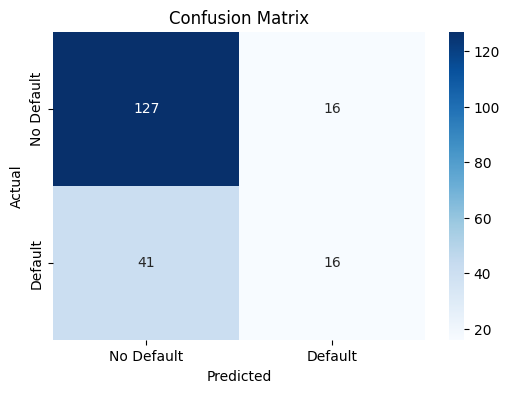

In [ ]:


# Selected Features
selected_features = [
    'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_ENTERTAINMENT_DEBT',
    'R_GROCERIES_DEBT', 'R_HEALTH_DEBT', 'R_TAX_DEBT', 'R_UTILITIES_DEBT',
    'R_EXPENDITURE_DEBT', 'CAT_CREDIT_CARD', 'CREDIT_SCORE'
]

# Target Variable
target_variable = 'DEFAULT'  # Ensure this is correctly named in your dataset

# Drop missing values (if any)
df = df.dropna(subset=selected_features + [target_variable])

# Define X and y
X = df[selected_features]
y = df[target_variable].astype(int)  # Ensure y is an integer (classification)

# Split into Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize & Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7076 - loss: 0.6392 - val_accuracy: 0.7150 - val_loss: 0.6148
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7157 - loss: 0.5835 - val_accuracy: 0.7150 - val_loss: 0.5909
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7017 - loss: 0.5845 - val_accuracy: 0.7150 - val_loss: 0.5750
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7195 - loss: 0.5630 - val_accuracy: 0.7150 - val_loss: 0.5690
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7074 - loss: 0.5747 - val_accuracy: 0.7200 - val_loss: 0.5630
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7281 - loss: 0.5530 - val_accuracy: 0.7250 - val_loss: 0.5585
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7417 - loss: 0.5483 - val_accuracy: 0.7450 - val_loss: 0.5543
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7087 - loss: 0.5636 - val_accuracy: 0.7450 - val_loss: 0.5547
Ep

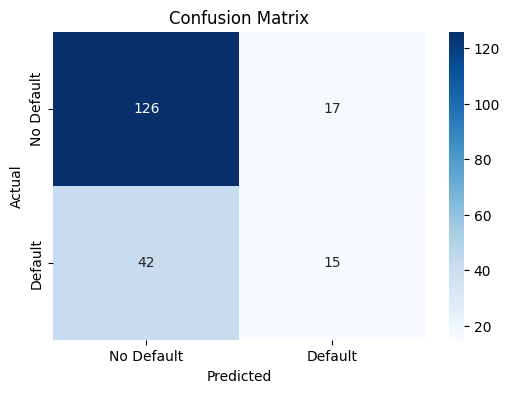

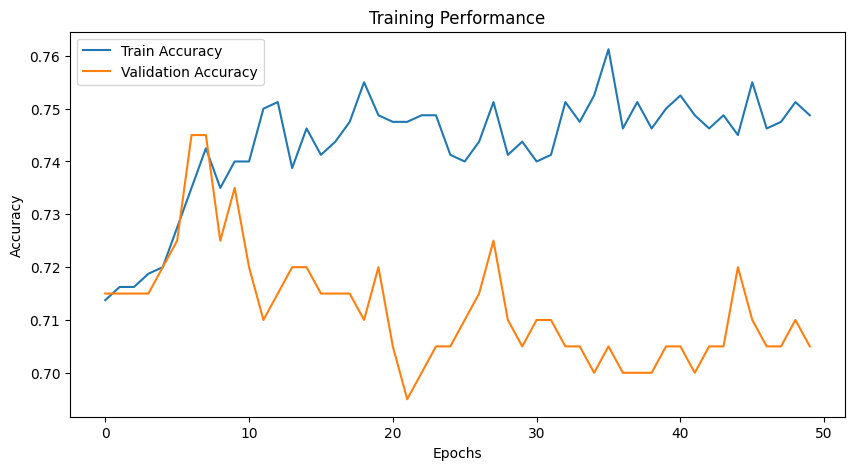

In [ ]:


# Selected Features
selected_features = [
    'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_ENTERTAINMENT_DEBT',
    'R_GROCERIES_DEBT', 'R_HEALTH_DEBT', 'R_TAX_DEBT', 'R_UTILITIES_DEBT',
    'R_EXPENDITURE_DEBT', 'CAT_CREDIT_CARD', 'CREDIT_SCORE'
]

target_variable = 'DEFAULT'

# Check for missing values and drop them
df = df.dropna(subset=selected_features + [target_variable])

# Define X and y
X = df[selected_features]
y = df[target_variable].astype(int)  # Ensure y is an integer (0 or 1)

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to categorical (for deep learning)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary Classification Output
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training History
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Performance")
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5371 - loss: 0.7606 - val_accuracy: 0.7000 - val_loss: 0.6417
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6451 - loss: 0.6904 - val_accuracy: 0.7350 - val_loss: 0.6181
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6769 - loss: 0.6397 - val_accuracy: 0.7500 - val_loss: 0.5982
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6555 - loss: 0.6484 - val_accuracy: 0.7450 - val_loss: 0.5856
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7072 - loss: 0.6226 - val_accuracy: 0.7400 - val_loss: 0.5752
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6981 - loss: 0.6095 - val_accuracy: 0.7400 - val_loss: 0.5667
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6953 - loss: 0.6208 - val_accuracy: 0.7300 - val_loss: 0.5625
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7118 - loss: 0.6199 - val_accuracy: 0.7350 - val_loss: 0.

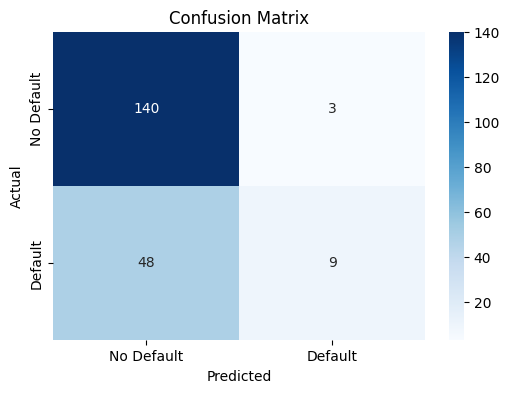

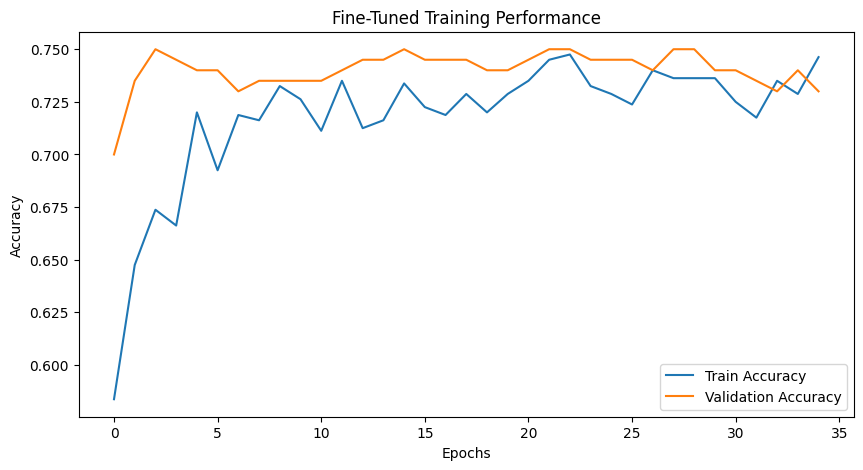

In [ ]:


# Selected Features
selected_features = [
    'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_ENTERTAINMENT_DEBT',
    'R_GROCERIES_DEBT', 'R_HEALTH_DEBT', 'R_TAX_DEBT', 'R_UTILITIES_DEBT',
    'R_EXPENDITURE_DEBT', 'CAT_CREDIT_CARD', 'CREDIT_SCORE'
]

target_variable = 'DEFAULT'

# Drop missing values
df = df.dropna(subset=selected_features + [target_variable])

# Define X and y
X = df[selected_features]
y = df[target_variable].astype(int)  # Ensure y is integer (0 or 1)

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to NumPy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Fine-Tuned Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary Classification Output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower LR for better convergence
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early Stopping (to prevent overfitting)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFine-Tuned Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training History
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Fine-Tuned Training Performance")
plt.show()


ExactExplainer explainer: 201it [00:49,  3.67it/s]


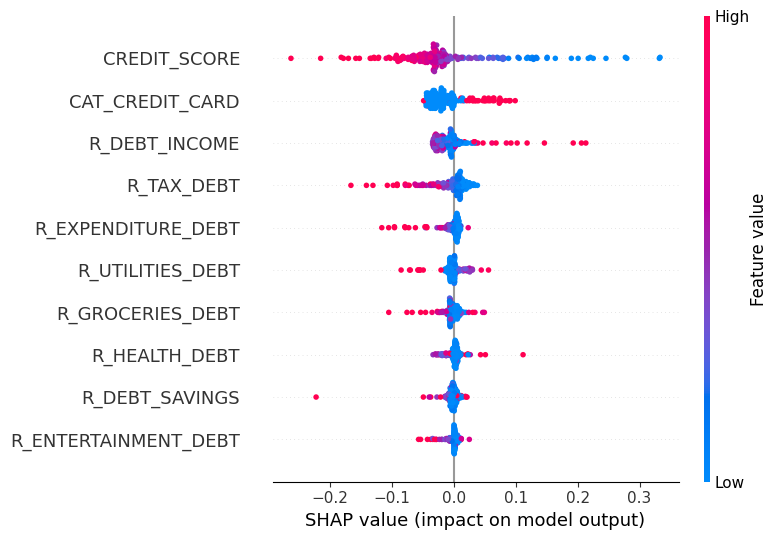

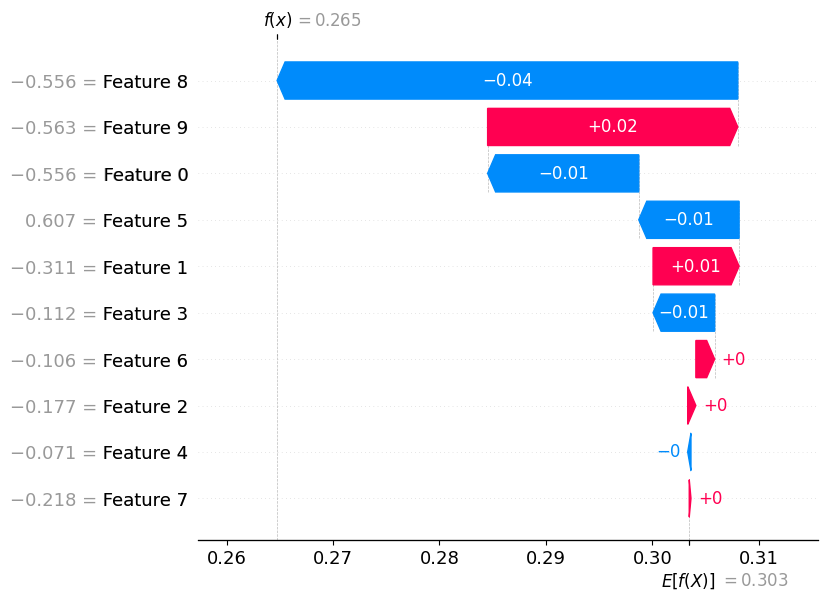

In [ ]:


# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize Feature Importance
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

# Visualize Single Prediction Explanation
shap.plots.waterfall(shap_values[0])  # First test sample
